In [4]:
import pandas as pd
import urllib
from urllib.parse import urlparse
import httplib2 as http
import json
import requests
import time
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

%load_ext autoreload
%autoreload 2

from my_functions import Distance_Data

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Getting Data

## LTA API
You can read more about LTA's Datamall API here:
https://datamall.lta.gov.sg/content/dam/datamall/datasets/LTA_DataMall_API_User_Guide.pdf

### Bus Stop Data

In [95]:
# Create an empty dataframe to store the data
stop_df = pd.DataFrame(columns = ['BusStopCode', 'RoadName', \
                                    'Description', 'Latitude', \
                                    'Longitude'])

In [96]:
# Extracting bus stop data
api_file_path = 'data/api_key.txt'
with open(api_file_path, 'r') as f:
            api_key = f.read().strip()
uri =  'http://datamall2.mytransport.sg/ltaodataservice/'
path = 'BusStops'
headers = { 'AccountKey' : api_key, 'accept' : 'application/json'}
method = 'GET'
h = http.Http()

for i in range(0,5500,500): # There are about 5000+ bus stops currently and they return a limit of 500 at a go
    skip = '?$skip=' + str(i)
    target = urlparse(uri + path + skip)
    print(f'The target url is {target.geturl()}')
    response, content = h.request(target.geturl(),method,'',headers)
    print(response)
    data = json.loads(content)
    df = pd.DataFrame(data['value'])
    stop_df =  pd.concat([stop_df, df], ignore_index=True)

The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=0
{'date': 'Sat, 25 Mar 2023 06:56:12 GMT', 'content-type': 'application/json;charset=UTF-8', 'transfer-encoding': 'chunked', 'connection': 'keep-alive', 'cache-control': 'no-store', 'content-language': 'en-SG', 'status': '200', 'content-location': 'http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=0'}
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=500
{'date': 'Sat, 25 Mar 2023 06:56:12 GMT', 'content-type': 'application/json;charset=UTF-8', 'transfer-encoding': 'chunked', 'connection': 'keep-alive', 'cache-control': 'no-store', 'content-language': 'en-SG', 'status': '200', 'content-location': 'http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=500'}
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=1000
{'date': 'Sat, 25 Mar 2023 06:56:12 GMT', 'content-type': 'application/json;charset=UTF-8', 'transfer-encoding': '

In [97]:
print(f'The dataframe has a shape of {stop_df.shape}')

The dataframe has a shape of (5083, 5)


In [98]:
# explore the data gotten from the API
stop_df.head()

BusStopCode       RoadName          Description  Latitude  Longitude
0       01012    Victoria St  Hotel Grand Pacific      1.30     103.85
1       01013    Victoria St      St. Joseph's Ch      1.30     103.85
2       01019    Victoria St      Bras Basah Cplx      1.30     103.85
3       01029  Nth Bridge Rd         Opp Natl Lib      1.30     103.85
4       01039  Nth Bridge Rd           Bugis Cube      1.30     103.86

In [99]:
stop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5083 entries, 0 to 5082
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BusStopCode  5083 non-null   object 
 1   RoadName     5083 non-null   object 
 2   Description  5083 non-null   object 
 3   Latitude     5083 non-null   float64
 4   Longitude    5083 non-null   float64
dtypes: float64(2), object(3)
memory usage: 198.7+ KB


In [100]:
# check for duplicates
stop_df.duplicated().sum()

0

In [101]:
# check for null values
stop_df.isnull().sum()

BusStopCode    0
RoadName       0
Description    0
Latitude       0
Longitude      0
dtype: int64

In [102]:
# check for unique values
stop_df.nunique()

BusStopCode    5083
RoadName        838
Description    4542
Latitude       5083
Longitude      5082
dtype: int64

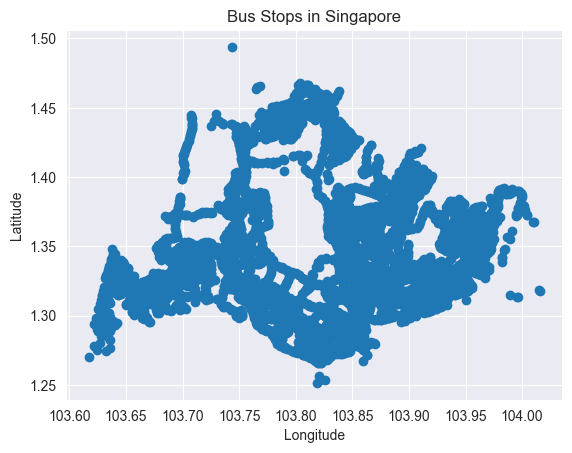

In [103]:
# plot latitude and longitude on a scatter plot to visualize
plt.scatter(stop_df['Longitude'],stop_df['Latitude'])
plt.title('Bus Stops in Singapore')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [104]:
# always export the data to a file locally if possible in case the kernel crashes

# file name
csv_file_name = 'data/bus_stops.csv'

# export data to csv
stop_df.to_csv(csv_file_name)

### Bus Traffic Data

In [105]:
# Extracting bus stop data
api_file_path = 'data/api_key.txt'
with open(api_file_path, 'r') as f:
            api_key = f.read().strip()
uri =  'http://datamall2.mytransport.sg/ltaodataservice/'
path = 'PV/Bus'
headers = { 'AccountKey' : api_key, 'accept' : 'application/json'}
method = 'GET'
h = http.Http()

for i in ['202211','202212','202301']: # only past 3 months are available
    skip = '?Date=' + i
    target = urlparse(uri + path + skip)
    print(f'The target url is {target.geturl()}')
    response, content = h.request(target.geturl(),method,'',headers)
    print(response)
    data = json.loads(content)
    print(data['value'])

The target url is http://datamall2.mytransport.sg/ltaodataservice/PV/Bus?Date=202211
{'date': 'Sat, 25 Mar 2023 06:56:14 GMT', 'content-type': 'text/plain', 'content-length': '0', 'connection': 'keep-alive', 'status': '404'}


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# import all the csvs and concat them
df = pd.read_csv('data/transport_node_bus_202211.csv')
df1 = pd.read_csv('data/transport_node_bus_202212.csv')
df2 = pd.read_csv('data/transport_node_bus_202301.csv')

traffic_df = pd.concat([df,df1,df2], ignore_index=True)

In [ ]:
print(f'The dataframe has a shape of {traffic_df.shape}')

The dataframe has a shape of (590332, 7)


In [ ]:
# explore the data gotten from the API
traffic_df.head()

YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_TYPE  PT_CODE  \
0    2022-11           WEEKDAY             17     BUS    45379   
1    2022-11  WEEKENDS/HOLIDAY             17     BUS    45379   
2    2022-11  WEEKENDS/HOLIDAY             13     BUS    80051   
3    2022-11           WEEKDAY             13     BUS    80051   
4    2022-11  WEEKENDS/HOLIDAY              8     BUS     3511   

   TOTAL_TAP_IN_VOLUME  TOTAL_TAP_OUT_VOLUME  
0                  375                   368  
1                  142                   102  
2                  965                   902  
3                 2329                  2319  
4                   50                   133

In [ ]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590332 entries, 0 to 590331
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   YEAR_MONTH            590332 non-null  object
 1   DAY_TYPE              590332 non-null  object
 2   TIME_PER_HOUR         590332 non-null  int64 
 3   PT_TYPE               590332 non-null  object
 4   PT_CODE               590332 non-null  int64 
 5   TOTAL_TAP_IN_VOLUME   590332 non-null  int64 
 6   TOTAL_TAP_OUT_VOLUME  590332 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 31.5+ MB


In [ ]:
# check for duplicates
traffic_df.duplicated().sum()

0

In [ ]:
# check for null values
traffic_df.isnull().sum()

YEAR_MONTH              0
DAY_TYPE                0
TIME_PER_HOUR           0
PT_TYPE                 0
PT_CODE                 0
TOTAL_TAP_IN_VOLUME     0
TOTAL_TAP_OUT_VOLUME    0
dtype: int64

In [ ]:
# check for unique values
traffic_df.nunique()

YEAR_MONTH                 3
DAY_TYPE                   2
TIME_PER_HOUR             24
PT_TYPE                    1
PT_CODE                 5082
TOTAL_TAP_IN_VOLUME     8153
TOTAL_TAP_OUT_VOLUME    8296
dtype: int64

In [ ]:
# drop useless columns
traffic_df.drop(columns = ['PT_TYPE'], inplace = True)

In [ ]:
# convert column to correct data type
traffic_df['PT_CODE']=traffic_df['PT_CODE'].astype('str')

# for each value in PT_code find out the length
traffic_df['PT_CODE_LEN'] = traffic_df['PT_CODE'].apply(lambda x: len(x))
print(traffic_df['PT_CODE_LEN'].value_counts())

# if length of PT_CODE is 4, add a 0 in front
traffic_df['PT_CODE'] = traffic_df['PT_CODE'].apply(lambda x: '0' + x if len(x) == 4 else x)

# drop the PT_CODE_LEN column
traffic_df.drop('PT_CODE_LEN', axis=1, inplace=True)

5    563474
4     26858
Name: PT_CODE_LEN, dtype: int64


In [ ]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590332 entries, 0 to 590331
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   YEAR_MONTH            590332 non-null  object
 1   DAY_TYPE              590332 non-null  object
 2   TIME_PER_HOUR         590332 non-null  int64 
 3   PT_CODE               590332 non-null  object
 4   TOTAL_TAP_IN_VOLUME   590332 non-null  int64 
 5   TOTAL_TAP_OUT_VOLUME  590332 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 27.0+ MB


In [ ]:
traffic_df.describe()

TIME_PER_HOUR  TOTAL_TAP_IN_VOLUME  TOTAL_TAP_OUT_VOLUME
count      590332.00            590332.00             590332.00
mean           13.28               391.03                391.03
std             6.13              1357.86               1303.43
min             0.00                 0.00                  0.00
25%             9.00                21.00                 23.00
50%            14.00               104.00                110.00
75%            18.00               352.00                354.00
max            23.00            113537.00              92366.00

In [ ]:
# always export the data to a file locally if possible in case the kernel crashes

# file name
csv_file_name = 'data/traffic_data.csv'

# export data to csv
traffic_df.to_csv(csv_file_name)

# Importing Data

## CSV Files

In [5]:
# file path
csv = 'data/mcdonalds_data.csv'

# import data to csv
mcd_df = pd.read_csv(csv)

print(mcd_df.head())

                                 title  \
0          McDonald's Tampines East CC   
1             McDonald's Tampines Mall   
2          McDonald's Tampines West CC   
3           McDonald's Bedok Reservoir   
4  McDonald's Pasir Ris Sports Complex   

                                             address  latitude  longitude  \
0  10 Tampines St 23, #01-01 Tampines East Commun...      1.35     103.95   
1  4 Tampines Central 5, #01 - 33 Tampines Mall, ...      1.35     103.94   
2  5 Tampines Ave 3, #01-01 Tampines West Communi...      1.35     103.94   
3  632 Bedok Reservoir Rd, #01-850, Singapore 470632      1.33     103.91   
4  120 Pasir Ris Central, #01-12 Sports Centre, S...      1.37     103.95   

  classification planning_area  makan index region region_type  population  \
0         Medium      Tampines         6.53   East         OCR      265850   
1         Medium      Tampines         6.53   East         OCR      265850   
2         Medium      Tampines         6.53   East

In [6]:
# file path
csv = 'data/traffic_data.csv'

# import data to csv
traffic_df = pd.read_csv(csv,index_col=0)

# convert column to correct data type
traffic_df['PT_CODE']=traffic_df['PT_CODE'].astype('str')

# for each value in PT_code find out the length
traffic_df['PT_CODE_LEN'] = traffic_df['PT_CODE'].apply(lambda x: len(x))
print(traffic_df['PT_CODE_LEN'].value_counts())

# if length of PT_CODE is 4, add a 0 in front
traffic_df['PT_CODE'] = traffic_df['PT_CODE'].apply(lambda x: '0' + x if len(x) == 4 else x)

# drop the PT_CODE_LEN column
traffic_df.drop('PT_CODE_LEN', axis=1, inplace=True)

print(traffic_df.head())

5    563474
4     26858
Name: PT_CODE_LEN, dtype: int64
  YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_CODE  TOTAL_TAP_IN_VOLUME  \
0    2022-11           WEEKDAY             17   45379                  375   
1    2022-11  WEEKENDS/HOLIDAY             17   45379                  142   
2    2022-11  WEEKENDS/HOLIDAY             13   80051                  965   
3    2022-11           WEEKDAY             13   80051                 2329   
4    2022-11  WEEKENDS/HOLIDAY              8   03511                   50   

   TOTAL_TAP_OUT_VOLUME  
0                   368  
1                   102  
2                   902  
3                  2319  
4                   133  


In [7]:
# file path
csv = 'data/bus_stops.csv'

# import data to csv
stops_df = pd.read_csv(csv, index_col=0)

# convert column to correct data type
stops_df['BusStopCode']=stops_df['BusStopCode'].astype('str')

# for each value in BusStopCode find out the length
stops_df['BusStopCode_LEN'] = stops_df['BusStopCode'].apply(lambda x: len(x))
print(stops_df['BusStopCode_LEN'].value_counts())

# if length of BusStopCode is 4, add a 0 in front
stops_df['BusStopCode'] = stops_df['BusStopCode'].apply(lambda x: '0' + x if len(x) == 4 else x)

# drop the BusStopCode_LEN column
stops_df.drop('BusStopCode_LEN', axis=1, inplace=True)

stops_df = stops_df.drop(columns=['RoadName','Description'])
stops_df['BusStopCode']=stops_df['BusStopCode'].astype(str)

pd.set_option('display.float_format', lambda x: '%.5f' % x)
print(stops_df.head())
pd.set_option('display.float_format', lambda x: '%.2f' % x)

5    4851
4     232
Name: BusStopCode_LEN, dtype: int64
  BusStopCode  Latitude  Longitude
0       01012   1.29685  103.85254
1       01013   1.29771  103.85322
2       01019   1.29699  103.85302
3       01029   1.29667  103.85441
4       01039   1.29821  103.85549


In [8]:
# Data obtained from 
# https://data.gov.sg/dataset/hdb-property-information
# Last updated 4 Jan 2023

# file path
csv = 'data/hdb-property-information.csv'

# import data to csv
hdb_info_df = pd.read_csv(csv)

print(hdb_info_df.head())

  blk_no             street  max_floor_lvl  year_completed residential  \
0      1           BEACH RD             16            1970           Y   
1      1    BEDOK STH AVE 1             14            1975           Y   
2      1      CANTONMENT RD              2            2010           N   
3      1       CHAI CHEE RD             15            1982           Y   
4      1  CHANGI VILLAGE RD              4            1975           Y   

  commercial market_hawker miscellaneous multistorey_carpark  \
0          Y             N             N                   N   
1          N             N             Y                   N   
2          Y             N             N                   N   
3          N             N             N                   N   
4          Y             N             N                   N   

  precinct_pavilion bldg_contract_town  total_dwelling_units  1room_sold  \
0                 N                KWN                   142           0   
1                 

In [9]:
# import other data previously feature engineered
hdb_df = pd.read_csv('data/hdb_df.csv')
hawker_df = pd.read_csv('data/hawker_df.csv')

hdb_02 = pd.read_csv('data/hdb_0.2.csv')
hdb_05 = pd.read_csv('data/hdb_0.5.csv')
hdb_1 = pd.read_csv('data/hdb_1.csv')
hdb_2 = pd.read_csv('data/hdb_2.csv')

hawker_02 = pd.read_csv('data/hawker_0.2.csv')
hawker_05 = pd.read_csv('data/hawker_0.5.csv')
hawker_1 = pd.read_csv('data/hawker_1.csv')
hawker_2 = pd.read_csv('data/hawker_2.csv')

in_weekday_eating_02 = pd.read_csv('data/in_weekday_eating_0.2.csv')
in_weekday_eating_05 = pd.read_csv('data/in_weekday_eating_0.5.csv')
in_weekday_eating_1 = pd.read_csv('data/in_weekday_eating_1.csv')
in_weekday_eating_2 = pd.read_csv('data/in_weekday_eating_2.csv')
in_weekday_total_02 = pd.read_csv('data/in_weekday_total_0.2.csv')
in_weekday_total_05 = pd.read_csv('data/in_weekday_total_0.5.csv')
in_weekday_total_1 = pd.read_csv('data/in_weekday_total_1.csv')
in_weekday_total_2 = pd.read_csv('data/in_weekday_total_2.csv')
in_weekday_working_02 = pd.read_csv('data/in_weekday_working_0.2.csv')
in_weekday_working_05 = pd.read_csv('data/in_weekday_working_0.5.csv')
in_weekday_working_1 = pd.read_csv('data/in_weekday_working_1.csv')
in_weekday_working_2 = pd.read_csv('data/in_weekday_working_2.csv')

out_weekday_eating_02 = pd.read_csv('data/out_weekday_eating_0.2.csv')
out_weekday_eating_05 = pd.read_csv('data/out_weekday_eating_0.5.csv')
out_weekday_eating_1 = pd.read_csv('data/out_weekday_eating_1.csv')
out_weekday_eating_2 = pd.read_csv('data/out_weekday_eating_2.csv')
out_weekday_total_02 = pd.read_csv('data/out_weekday_total_0.2.csv')
out_weekday_total_05 = pd.read_csv('data/out_weekday_total_0.5.csv')
out_weekday_total_1 = pd.read_csv('data/out_weekday_total_1.csv')
out_weekday_total_2 = pd.read_csv('data/out_weekday_total_2.csv')
out_weekday_working_02 = pd.read_csv('data/out_weekday_working_0.2.csv')
out_weekday_working_05 = pd.read_csv('data/out_weekday_working_0.5.csv')
out_weekday_working_1 = pd.read_csv('data/out_weekday_working_1.csv')
out_weekday_working_2 = pd.read_csv('data/out_weekday_working_2.csv')

in_weekends_holiday_eating_02 = pd.read_csv('data/in_weekends_holiday_eating_0.2.csv')
in_weekends_holiday_eating_05 = pd.read_csv('data/in_weekends_holiday_eating_0.5.csv')
in_weekends_holiday_eating_1 = pd.read_csv('data/in_weekends_holiday_eating_1.csv')
in_weekends_holiday_eating_2 = pd.read_csv('data/in_weekends_holiday_eating_2.csv')
in_weekends_holiday_total_02 = pd.read_csv('data/in_weekends_holiday_total_0.2.csv')
in_weekends_holiday_total_05 = pd.read_csv('data/in_weekends_holiday_total_0.5.csv')
in_weekends_holiday_total_1 = pd.read_csv('data/in_weekends_holiday_total_1.csv')
in_weekends_holiday_total_2 = pd.read_csv('data/in_weekends_holiday_total_2.csv')
in_weekends_holiday_working_02 = pd.read_csv('data/in_weekends_holiday_working_0.2.csv')
in_weekends_holiday_working_05 = pd.read_csv('data/in_weekends_holiday_working_0.5.csv')
in_weekends_holiday_working_1 = pd.read_csv('data/in_weekends_holiday_working_1.csv')
in_weekends_holiday_working_2 = pd.read_csv('data/in_weekends_holiday_working_2.csv')

out_weekends_holiday_eating_02 = pd.read_csv('data/out_weekends_holiday_eating_0.2.csv')
out_weekends_holiday_eating_05 = pd.read_csv('data/out_weekends_holiday_eating_0.5.csv')
out_weekends_holiday_eating_1 = pd.read_csv('data/out_weekends_holiday_eating_1.csv')
out_weekends_holiday_eating_2 = pd.read_csv('data/out_weekends_holiday_eating_2.csv')
out_weekends_holiday_total_02 = pd.read_csv('data/out_weekends_holiday_total_0.2.csv')
out_weekends_holiday_total_05 = pd.read_csv('data/out_weekends_holiday_total_0.5.csv')
out_weekends_holiday_total_1 = pd.read_csv('data/out_weekends_holiday_total_1.csv')
out_weekends_holiday_total_2 = pd.read_csv('data/out_weekends_holiday_total_2.csv')
out_weekends_holiday_working_02 = pd.read_csv('data/out_weekends_holiday_working_0.2.csv')
out_weekends_holiday_working_05 = pd.read_csv('data/out_weekends_holiday_working_0.5.csv')
out_weekends_holiday_working_1 = pd.read_csv('data/out_weekends_holiday_working_1.csv')
out_weekends_holiday_working_2 = pd.read_csv('data/out_weekends_holiday_working_2.csv')

## EDA & Feature Engineering

### Getting latitude and longitude of all hdbs in Singapore

In [ ]:
latitude = []
longitude = []

for i in range(len(hdb_info_df)):
    url = f"https://developers.onemap.sg/commonapi/search?searchVal={hdb_info_df.loc[i,'address']}&returnGeom=Y&getAddrDetails=N&pageNum=1"
    data = requests.get(url).json()
    try:
        latitude.append(data['results'][0]['LATITUDE'])
        longitude.append(data['results'][0]['LONGITUDE'])
    except:
        latitude.append(0)
        longitude.append(0)
    time.sleep(0.15)
    print(f'this is run {i}')

In [ ]:
print(len(latitude))
print(len(longitude))

In [ ]:
# save latitudes and longitudes into hdb_df as 'latitude' and 'longitude'
hdb_info_df['latitude'] = latitude
hdb_info_df['longitude'] = longitude

In [ ]:
# export hdb_df as csv
hdb_info_df.to_csv('data/hdb_df.csv', index=False)

### Getting latitude and longitude of all hawkers in Singapore

In [ ]:
# Data retrieved from
# https://data.gov.sg/dataset/hawker-centres?resource_id=8a6c2f75-5511-4e03-b8f2-23ce67d30b28
# Last updated 1 Sep 2021

# import geojson file
with open('data/hawker-centres-geojson.geojson') as f:
    data = json.load(f)

In [ ]:
h_latitude=[]
h_longitude=[]

for i in range(len(data['features'])):
    h_latitude.append(data['features'][i]['geometry']['coordinates'][1])
    h_longitude.append(data['features'][i]['geometry']['coordinates'][0])

# create a dataframe to store the hawker centre data
hawker_df = pd.DataFrame(columns=['latitude', 'longitude'])
hawker_df['latitude']=h_latitude
hawker_df['longitude']=h_longitude

### Exploring mcd_df

In [10]:
mcd_df.head()

title  \
0          McDonald's Tampines East CC   
1             McDonald's Tampines Mall   
2          McDonald's Tampines West CC   
3           McDonald's Bedok Reservoir   
4  McDonald's Pasir Ris Sports Complex   

                                             address  latitude  longitude  \
0  10 Tampines St 23, #01-01 Tampines East Commun...      1.35     103.95   
1  4 Tampines Central 5, #01 - 33 Tampines Mall, ...      1.35     103.94   
2  5 Tampines Ave 3, #01-01 Tampines West Communi...      1.35     103.94   
3  632 Bedok Reservoir Rd, #01-850, Singapore 470632      1.33     103.91   
4  120 Pasir Ris Central, #01-12 Sports Centre, S...      1.37     103.95   

  classification planning_area  makan index region region_type  population  \
0         Medium      Tampines         6.53   East         OCR      265850   
1         Medium      Tampines         6.53   East         OCR      265850   
2         Medium      Tampines         6.53   East         OCR      265850   
3            Low         Bedok         6.25   East         OCR      278970   
4           High     Pasir Ris         6.37   East         OCR      146410   

   size  density property_type  
0 20.89 12726.18         State  
1 20.89 12726.18        Retail  
2 20.89 12726.18         State  
3 21.69 12861.69           NaN  
4 15.02  9747.67         State

In [11]:
mcd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           144 non-null    object 
 1   address         144 non-null    object 
 2   latitude        144 non-null    float64
 3   longitude       144 non-null    float64
 4   classification  144 non-null    object 
 5   planning_area   144 non-null    object 
 6   makan index     144 non-null    float64
 7   region          144 non-null    object 
 8   region_type     144 non-null    object 
 9   population      144 non-null    int64  
 10  size            144 non-null    float64
 11  density         144 non-null    float64
 12  property_type   76 non-null     object 
dtypes: float64(5), int64(1), object(7)
memory usage: 14.8+ KB


In [ ]:
mcd_df.nunique()

title             144
address           144
latitude          144
longitude         144
classification      5
planning_area      38
hawker index       22
region              5
region_type         3
property_type       4
population         37
size               36
density            37
dtype: int64

In [ ]:
# do a value count of our target classification
mcd_df['classification'].value_counts()

Medium     77
High       31
Low        29
Tourist     4
Student     3
Name: classification, dtype: int64

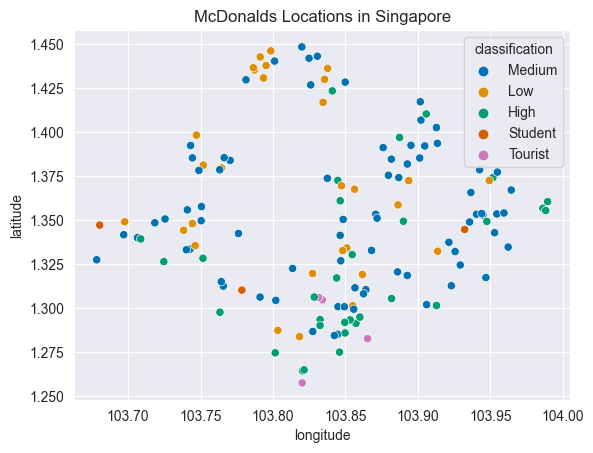

In [12]:
# do a scatter plot for latitude and longitude with color as classification
sns.scatterplot(data=mcd_df, x='longitude', y='latitude', hue='classification', palette='colorblind')
plt.title('McDonalds Locations in Singapore')
plt.show()

- Most of the mcdonalds that are 'Low' tend to be from the North.
- 'Medium' is the dominant classification
- 'High' is the most dominant near the central region of Singapore

## Feature Engineering

In [13]:
# set a list of distances in km
distance_list = [2,1,0.5,0.2]

### Hawker_count

In [ ]:
# Get the num_hawker feature data
for i in distance_list:
    print(f'This is the run for distance {i}km')
    
    # this function initiates the dataframe based on the length of mcd_df and then computes the number of X within the distance
    # the columns of the item to be counted must be 'latitude' and 'longitude'
    result = Distance_Data(mcd_df).num_count(i,mcd_df,hawker_df,'hawker_count')

    # save the data to csv
    result.to_csv(f'hawker_{i}.csv', index=False)
    print(f'Successfully finished for distance {i}km')

This is the run for distance 0.2km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 0.2km
This is the run for distance 0.5km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 0.5km
This is the run for distance 1km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 1km
This is the run for distance 2km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 2km


### Hdb_count

In [ ]:
# Get the num_hdb feature data
for i in distance_list:
    print(f'This is the run for distance {i}km')
    
    # this function initiates the dataframe based on the length of mcd_df and then computes the number of X within the distance
    # the columns of the item to be counted must be 'latitude' and 'longitude'
    result = Distance_Data(mcd_df).num_count(i,mcd_df,hdb_df,'hdb_count')

    # save the data to csv
    result.to_csv(f'hdb_{i}.csv', index=False)
    print(f'Successfully finished for distance {i}km')

This is the run for distance 0.2km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 0.2km
This is the run for distance 0.5km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 0.5km
This is the run for distance 1km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 1km
This is the run for distance 2km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 2km


### Bus stop count and traffic

In [14]:
# merge stops and traffic
stops_traffic_df = pd.merge(traffic_df, stops_df, right_on='BusStopCode', left_on='PT_CODE',how='left')

In [15]:
stops_traffic_df[stops_traffic_df['Latitude'].isnull()]['PT_CODE'].value_counts()

98231    121
40189    121
98059    120
98051    120
98031    119
98039    116
98239    112
Name: PT_CODE, dtype: int64

In [16]:
# manually impute PT_CODE 98231 with latitude and longitude numbers
# https://businterchange.net/sgbus/stops/busstop.php?stop=98231
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98231','Latitude']=1.3712054765689932 
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98231','Longitude']=103.97183863961368

# https://businterchange.net/sgbus/stops/busstop.php?stop=98239
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98239','Latitude']=1.3715083131923107 
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98239','Longitude']=103.97261543551689

# https://businterchange.net/sgbus/stops/busstop.php?stop=40189
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='40189','Latitude']=1.312394537329837  
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='40189','Longitude']=103.83917866460602

# https://businterchange.net/sgbus/stops/busstop.php?stop=98059
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98059','Latitude']=1.3733394338087794  
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98059','Longitude']=103.9746197614457

# https://businterchange.net/sgbus/stops/busstop.php?stop=98051
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98051','Latitude']=1.3731678217387
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98051','Longitude']=103.9746734056245

# https://businterchange.net/sgbus/stops/busstop.php?stop=98031
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98031','Latitude']=1.3802596577286035 
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98031','Longitude']=103.94264233700554

# https://businterchange.net/sgbus/stops/busstop.php?stop=98039
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98039','Latitude']=1.367588514611644
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98039','Longitude']=103.96888269398227

In [17]:
stops_traffic_df[stops_traffic_df['Latitude'].isnull()]['PT_CODE'].value_counts()

Series([], Name: PT_CODE, dtype: int64)

In [18]:
# rename column to latitude and longitude
stops_traffic_df.rename(columns={'Latitude':'latitude','Longitude':'longitude'}, inplace=True)
stops_traffic_df.rename(columns={'TOTAL_TAP_IN_VOLUME':'in','TOTAL_TAP_OUT_VOLUME':'out'}, inplace=True)

# replace / in DAY_TYPE column with _
stops_traffic_df['DAY_TYPE'] = stops_traffic_df['DAY_TYPE'].str.replace('/','_')

In [19]:
# how much data do we have of stops?
stops_traffic_df.TIME_PER_HOUR.value_counts()

8     30116
7     30065
12    30064
13    30016
17    30005
9     29999
18    29991
14    29989
11    29983
15    29941
19    29928
16    29921
10    29915
20    29673
6     29554
21    28982
22    28703
23    28067
0     23820
5     20304
1      9701
2      1030
3       333
4       232
Name: TIME_PER_HOUR, dtype: int64

In [20]:
# how much data do we have of stops?
stops_traffic_df.DAY_TYPE.value_counts()

WEEKDAY             296138
WEEKENDS_HOLIDAY    294194
Name: DAY_TYPE, dtype: int64

In [21]:
stops_traffic_df.head()

YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_CODE    in   out BusStopCode  \
0    2022-11           WEEKDAY             17   45379   375   368       45379   
1    2022-11  WEEKENDS_HOLIDAY             17   45379   142   102       45379   
2    2022-11  WEEKENDS_HOLIDAY             13   80051   965   902       80051   
3    2022-11           WEEKDAY             13   80051  2329  2319       80051   
4    2022-11  WEEKENDS_HOLIDAY              8   03511    50   133       03511   

   latitude  longitude  
0      1.39     103.75  
1      1.39     103.75  
2      1.31     103.87  
3      1.31     103.87  
4      1.28     103.86

In [52]:
# get dataframe of PT_CODE by latitude and longitude
location_df = stops_traffic_df[['PT_CODE','latitude','longitude']].drop_duplicates()
# sort index by PT_CODE
location_df.sort_values(by='PT_CODE', inplace=True)
# reset index values
location_df.reset_index(drop=True, inplace=True)

# inspect location_df
print(location_df.head())
location_df.shape

  PT_CODE  latitude  longitude
0   01012      1.30     103.85
1   01013      1.30     103.85
2   01019      1.30     103.85
3   01029      1.30     103.85
4   01039      1.30     103.86


(5082, 3)

In [56]:
# create a new 96 x 5082 matrix for 96 types of traffic data (2 traffic type x 2 day type x 24 hours) against 5082 bus stops

# pivot the dataframe to reshape it
bus_data = stops_traffic_df.pivot_table(index='PT_CODE', columns=['DAY_TYPE', 'TIME_PER_HOUR'], values=['in', 'out'], aggfunc='sum')

# flatten the column index
bus_data.columns = [f'{col[1]}_{col[2]}_{col[0]}' for col in bus_data.columns]

column_list = bus_data.columns.tolist()

# tranpose the dataframe 
bus_data = bus_data.T

# transform it into a numpy array of a 96 x 5082 matrix
bus_data = bus_data.to_numpy()

# fill nan with 0
bus_data = np.nan_to_num(new_df)

# print the new dataframe
print(f'the shape of the {type(bus_data)} is {bus_data.shape}')
print('inspecting some values...')
print(bus_data)

# rows: 96 weekday/weekends_holiday + 0-23 hours + in/out 
# columns: 5082 bus stops arranged in numerical order

the shape of the <class 'numpy.ndarray'> is (96, 5082)
inspecting some values...
[[728. 179. 164. ...   5. 288.  26.]
 [  3.   0.   0. ...   0.   0.   7.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [709. 426. 347. ...  28. 241. 193.]
 [654. 338. 323. ...  22. 172. 219.]
 [334. 235. 216. ...  11.  75.  97.]]


In [82]:
# multiply the bus_data 96 x 5082 matrix  by a 5082 x 4 (distance_list) matrix to get a 96 x 4 matrix for each McDonalds
mcd_list = Distance_Data(mcd_df).traffic_count(mcd_df,location_df,bus_data,distance_list)

Number of arrays in list: 1
Number of arrays in list: 2
Number of arrays in list: 3
Number of arrays in list: 4
Number of arrays in list: 5
Number of arrays in list: 6
Number of arrays in list: 7
Number of arrays in list: 8
Number of arrays in list: 9
Number of arrays in list: 10
Number of arrays in list: 11
Number of arrays in list: 12
Number of arrays in list: 13
Number of arrays in list: 14
Number of arrays in list: 15
Number of arrays in list: 16
Number of arrays in list: 17
Number of arrays in list: 18
Number of arrays in list: 19
Number of arrays in list: 20
Number of arrays in list: 21
Number of arrays in list: 22
Number of arrays in list: 23
Number of arrays in list: 24
Number of arrays in list: 25
Number of arrays in list: 26
Number of arrays in list: 27
Number of arrays in list: 28
Number of arrays in list: 29
Number of arrays in list: 30
Number of arrays in list: 31
Number of arrays in list: 32
Number of arrays in list: 33
Number of arrays in list: 34
Number of arrays in lis

In [80]:
# show the list a
a[2]

array([[2.62170e+04, 6.52600e+03, 1.16300e+03, 2.81000e+02, 6.37000e+02,
        3.09000e+02, 4.30000e+01, 1.90000e+01, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 8.00000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.13108e+05, 3.34430e+04, 9.67700e+03, 1.54200e+03, 4.84614e+05,
        1.51987e+05, 3.41950e+04, 2.18400e+03, 7.35478e+05, 2.24919e+05,
        4.98910e+04, 3.63200e+03, 6.36224e+05, 2.09646e+05, 4.58060e+04,
        2.71800e+03, 4.36345e+05, 1.43475e+05, 3.74010e+04, 2.50900e+03,
        3.98165e+05, 1.32628e+05, 4.33290e+04, 2.94200e+03, 4.11145e+05,
        1.39926e+05, 4.87800e+04, 3.23300e+03, 4.65215e+05, 1.57828e+05,
        5.74070e+04, 3.30400e+03, 5.14732e+05, 1.65580e+05, 6.39180e+04,
        6.50000e+03, 4.62104e+05, 1.44607e+05, 4.67470e+04, 3.93600e+03,
        4.76524e+05, 1.58709e+05, 5.39220e+04, 3.33200e+03, 5.33347e+05,
        1.79980e+05, 7.09410e+04, 4.02300e+03, 6.70

## EDA Continued

In [ ]:
mcd_df.groupby(['classification'])['density'].mean()

classification
High       8117.08
Low       14114.16
Medium    13420.00
Student    5826.90
Tourist     399.55
Name: density, dtype: float64

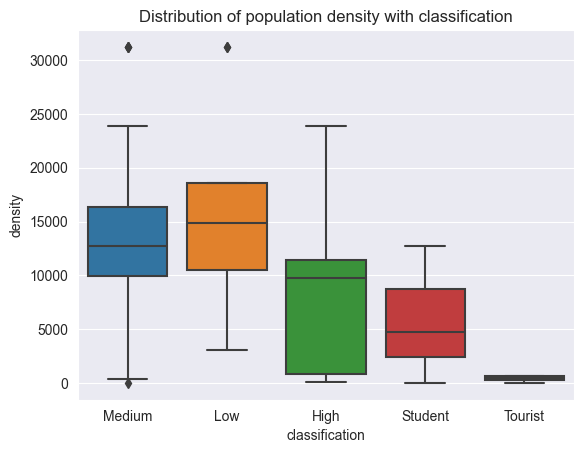

In [ ]:
# set the title
plt.title('Distribution of population density with classification')

# set the x-axis label
plt.xlabel('Classification')

# set the y-axis label
plt.ylabel('Density')

# plot the violin plot
sns.boxplot(x='classification', y='density', data=mcd_df)

# show the plot
plt.show()


In [ ]:
# define the category labels for each bin
bin_labels = ['l', 'm', 'h']

# use pd.cut() to create the new category column
mcd_df['pop_bins'] = pd.qcut(mcd_df['population'], q=3, labels=bin_labels)

In [ ]:
mcd_df.pop_bins.value_counts()

l    50
m    50
h    44
Name: pop_bins, dtype: int64

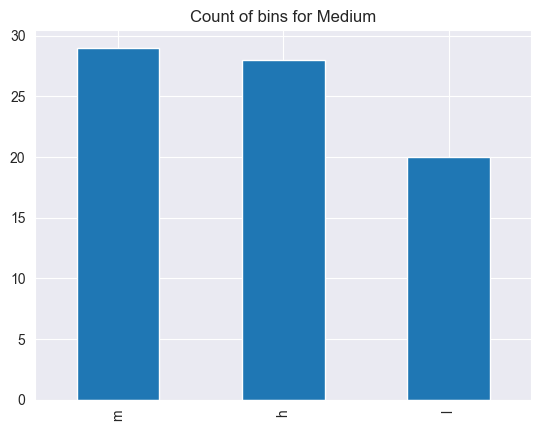

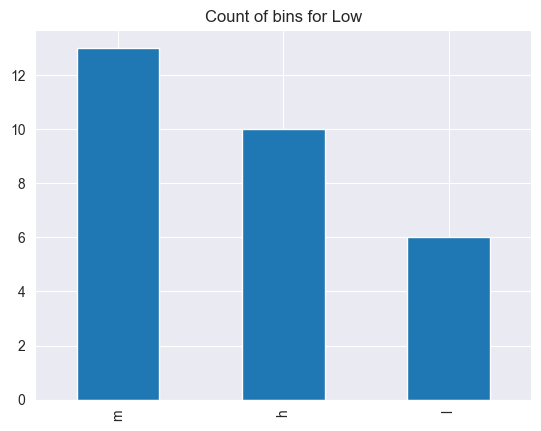

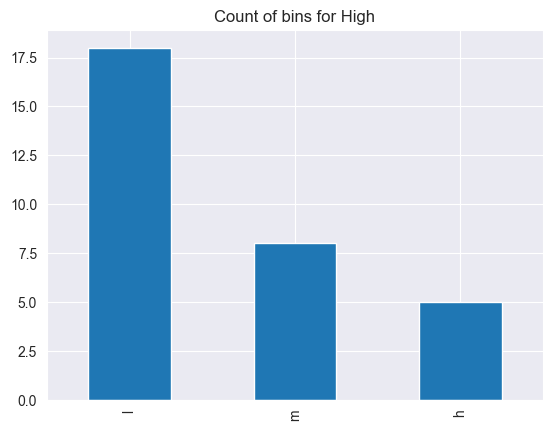

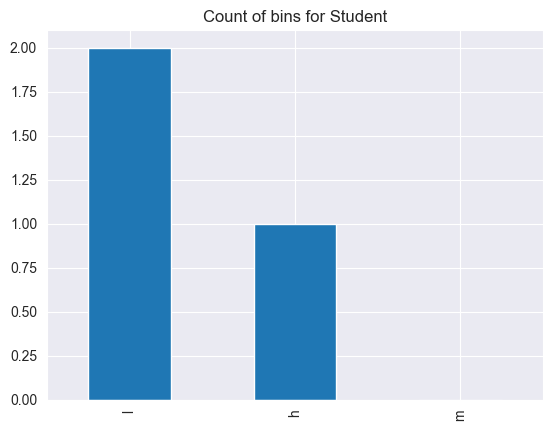

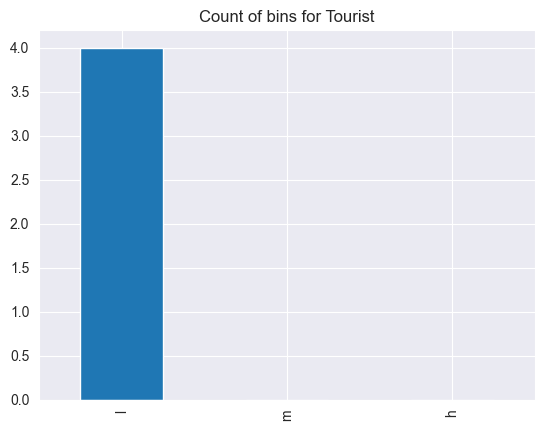

In [ ]:
# for each classification plot a bar chart of count of bins
for i in mcd_df.classification.unique():
    mcd_df[mcd_df['classification']==i]['pop_bins'].value_counts().plot(kind='bar')
    plt.title(f'Count of bins for {i}')
    plt.show()

In [ ]:
# define the category labels for each bin
bin_labels = ['l', 'm', 'h']

# use pd.cut() to create the new category column
mcd_df['pop_bins'] = pd.qcut(mcd_df['density'], q=3, labels=bin_labels)

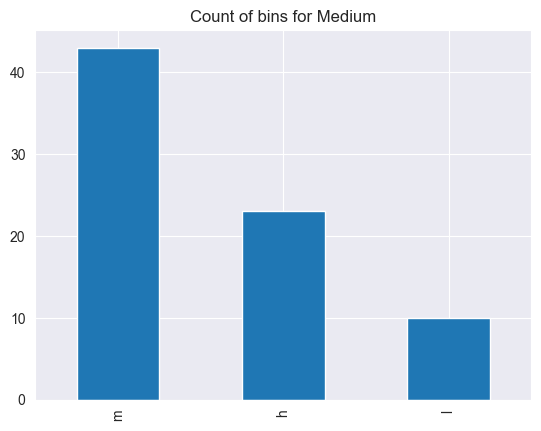

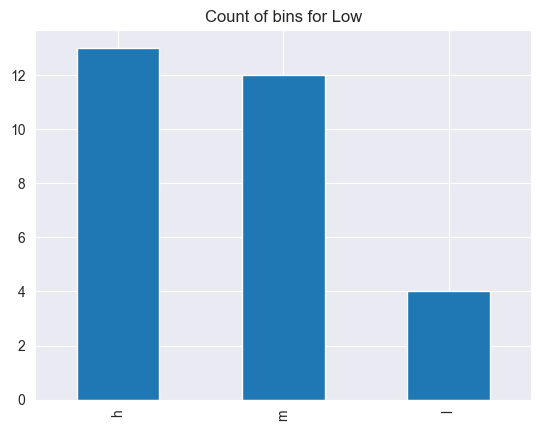

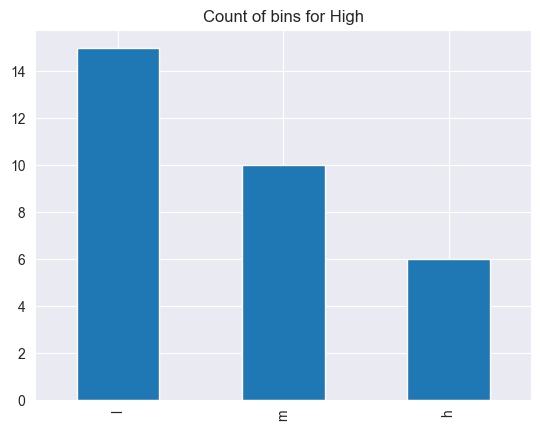

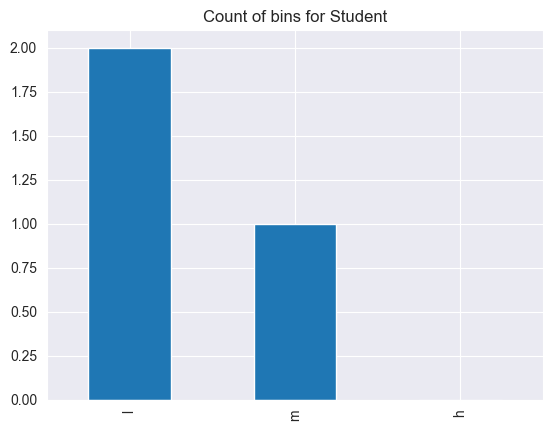

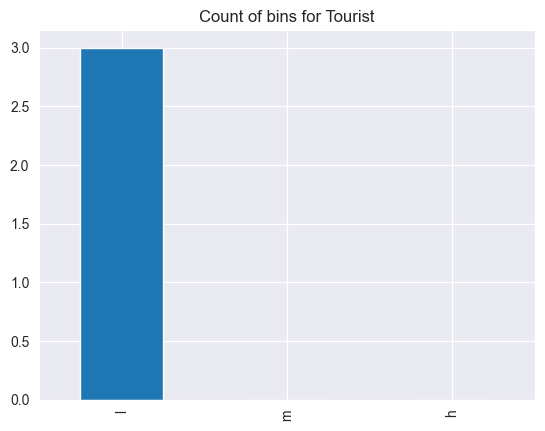

In [ ]:
# for each classification plot a bar chart of count of bins
for i in mcd_df.classification.unique():
    mcd_df[mcd_df['classification']==i]['bins'].value_counts().plot(kind='bar')
    plt.title(f'Count of bins for {i}')
    plt.show()

In [ ]:
# define the bin edges to create categories
bin_edges = [0, max(mcd_df['density'])/4, max(mcd_df['density'])/2, max(mcd_df['density'])]

# define the category labels for each bin
bin_labels = ['l', 'm', 'h']

# use pd.cut() to create the new category column
mcd_df['bins'] = pd.cut(mcd_df['density'], bins=bin_edges, labels=bin_labels)

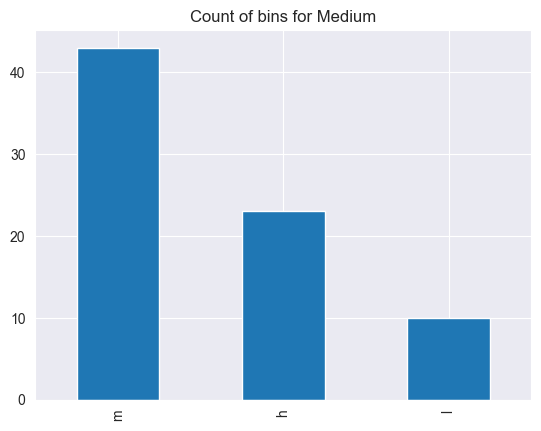

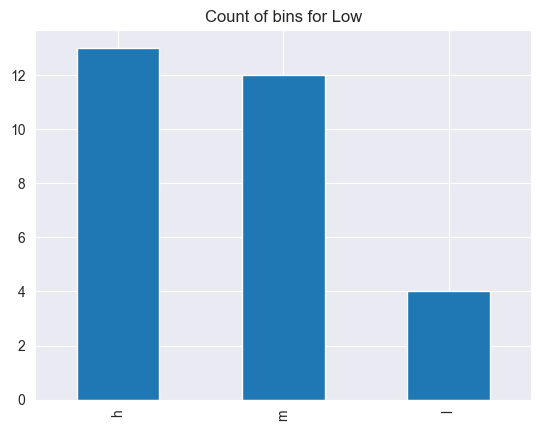

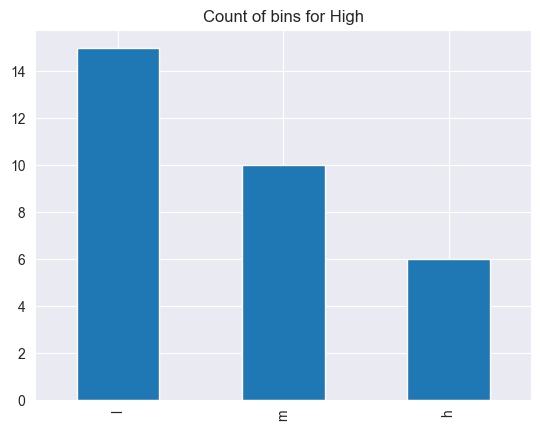

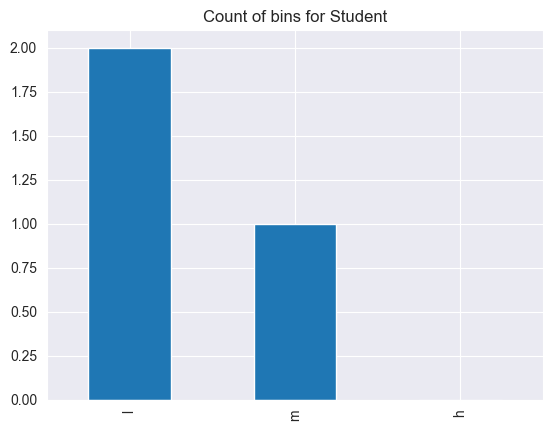

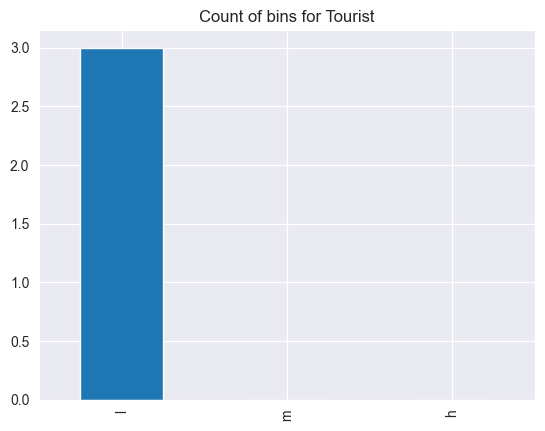

In [ ]:
# for each classification plot a bar chart of count of bins
for i in mcd_df.classification.unique():
    mcd_df[mcd_df['classification']==i]['bins'].value_counts().plot(kind='bar')
    plt.title(f'Count of bins for {i}')
    plt.show()

In [ ]:
# concatenate all the dataframes
mcd_df = pd.concat([mcd_df,\
                    hawker_02,hawker_05,hawker_1,hawker_2,\
                        hdb_02,hdb_05,hdb_1,hdb_2,\
                            in_weekday_working_02,in_weekday_working_05,in_weekday_working_1,in_weekday_working_2,\
                                in_weekday_eating_02,in_weekday_eating_05,in_weekday_eating_1,in_weekday_eating_2,\
                                    in_weekday_total_02,in_weekday_total_05,in_weekday_total_1,in_weekday_total_2,\
                                        in_weekends_holiday_working_02,in_weekends_holiday_working_05,in_weekends_holiday_working_1,in_weekends_holiday_working_2,\
                                            in_weekends_holiday_eating_02,in_weekends_holiday_eating_05,in_weekends_holiday_eating_1,in_weekends_holiday_eating_2,\
                                                in_weekends_holiday_total_02,in_weekends_holiday_total_05,in_weekends_holiday_total_1,in_weekends_holiday_total_2,\
                                                    out_weekday_working_02,out_weekday_working_05,out_weekday_working_1,out_weekday_working_2,\
                                                        out_weekday_eating_02,out_weekday_eating_05,out_weekday_eating_1,out_weekday_eating_2,\
                                                            out_weekday_total_02,out_weekday_total_05,out_weekday_total_1,out_weekday_total_2,\
                                                                out_weekends_holiday_working_02,out_weekends_holiday_working_05,out_weekends_holiday_working_1,out_weekends_holiday_working_2,\
                                                                    out_weekends_holiday_eating_02,out_weekends_holiday_eating_05,out_weekends_holiday_eating_1,out_weekends_holiday_eating_2,\
                                                                        out_weekends_holiday_total_02,out_weekends_holiday_total_05,out_weekends_holiday_total_1,out_weekends_holiday_total_2\
                            ], axis=1)

In [ ]:
# fill 0 with 1 for population because we want to avoid infinity values for average traffic per planning area for the next step
mcd_df['population'] = mcd_df['population'].replace(0,1)

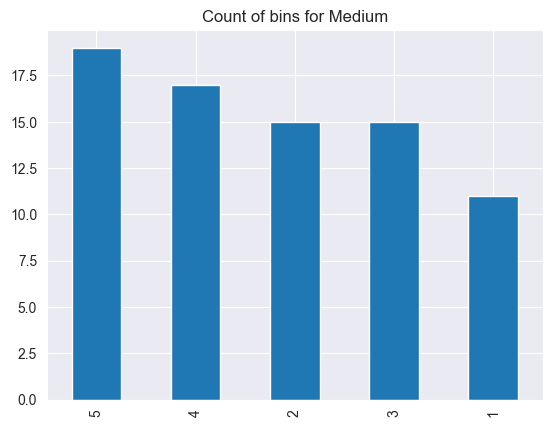

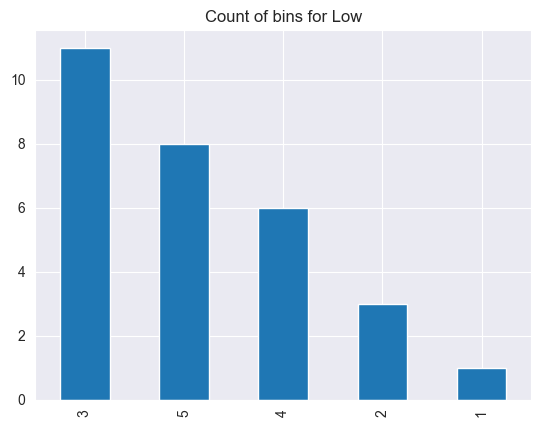

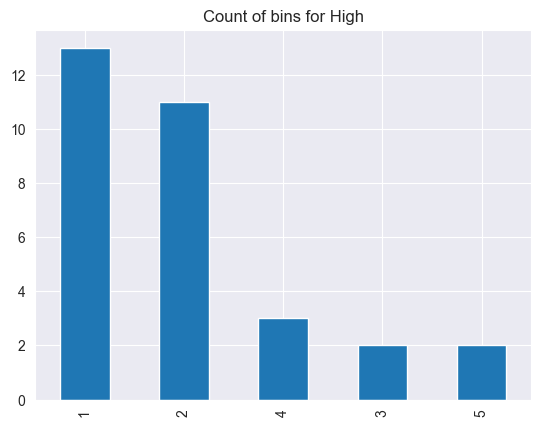

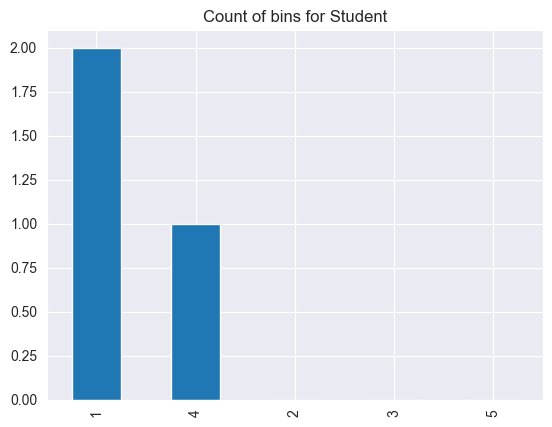

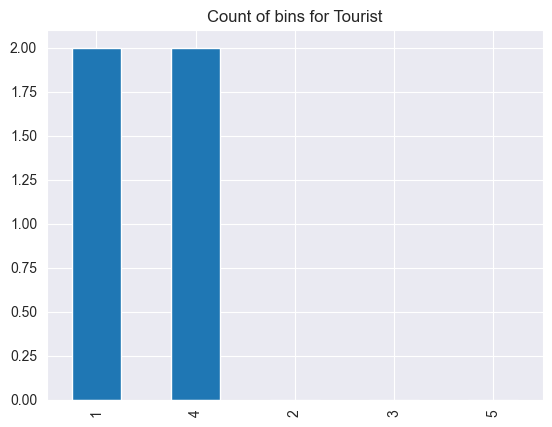

In [ ]:
# define the category labels for each bin
bin_labels = ['1', '2', '3', '4', '5']

# use pd.cut() to create the new category column
mcd_df['in_WEEKENDS_HOLIDAY_total_0.2_bin'] = pd.qcut(mcd_df['in_WEEKENDS_HOLIDAY_total_0.2'], q=5, labels=bin_labels)

# for each classification plot a bar chart of count of bins
for i in mcd_df.classification.unique():
    mcd_df[mcd_df['classification']==i]['in_WEEKENDS_HOLIDAY_total_0.2_bin'].value_counts().plot(kind='bar')
    plt.title(f'Count of bins for {i}')
    plt.show()

In [ ]:
mcd_df['in_WEEKDAY_working_02_pop'] = mcd_df['in_WEEKDAY_working_0.2'] / mcd_df['population']
mcd_df['in_WEEKDAY_working_05_pop'] = mcd_df['in_WEEKDAY_working_0.5'] / mcd_df['population']
mcd_df['in_WEEKDAY_working_1_pop'] = mcd_df['in_WEEKDAY_working_1'] / mcd_df['population']
mcd_df['in_WEEKDAY_working_2_pop'] = mcd_df['in_WEEKDAY_working_2'] / mcd_df['population']

mcd_df['in_WEEKDAY_eating_02_pop'] = mcd_df['in_WEEKDAY_eating_0.2'] / mcd_df['population']
mcd_df['in_WEEKDAY_eating_05_pop'] = mcd_df['in_WEEKDAY_eating_0.5'] / mcd_df['population']
mcd_df['in_WEEKDAY_eating_1_pop'] = mcd_df['in_WEEKDAY_eating_1'] / mcd_df['population']
mcd_df['in_WEEKDAY_eating_2_pop'] = mcd_df['in_WEEKDAY_eating_2'] / mcd_df['population']

mcd_df['in_WEEKDAY_total_02_pop'] = mcd_df['in_WEEKDAY_total_0.2'] / mcd_df['population']
mcd_df['in_WEEKDAY_total_05_pop'] = mcd_df['in_WEEKDAY_total_0.5'] / mcd_df['population']
mcd_df['in_WEEKDAY_total_1_pop'] = mcd_df['in_WEEKDAY_total_1'] / mcd_df['population']
mcd_df['in_WEEKDAY_total_2_pop'] = mcd_df['in_WEEKDAY_total_2'] / mcd_df['population']

mcd_df['in_WEEKENDS_HOLIDAY_working_02_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_working_0.2'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_working_05_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_working_0.5'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_working_1_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_working_1'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_working_2_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_working_2'] / mcd_df['population']

mcd_df['in_WEEKENDS_HOLIDAY_eating_02_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_eating_0.2'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_eating_05_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_eating_0.5'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_eating_1_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_eating_1'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_eating_2_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_eating_2'] / mcd_df['population']

mcd_df['in_WEEKENDS_HOLIDAY_total_02_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_total_0.2'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_total_05_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_total_0.5'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_total_1_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_total_1'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_total_2_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_total_2'] / mcd_df['population']

mcd_df['out_WEEKDAY_working_02_pop'] = mcd_df['out_WEEKDAY_working_0.2'] / mcd_df['population']
mcd_df['out_WEEKDAY_working_05_pop'] = mcd_df['out_WEEKDAY_working_0.5'] / mcd_df['population']
mcd_df['out_WEEKDAY_working_1_pop'] = mcd_df['out_WEEKDAY_working_1'] / mcd_df['population']
mcd_df['out_WEEKDAY_working_2_pop'] = mcd_df['out_WEEKDAY_working_2'] / mcd_df['population']

mcd_df['out_WEEKDAY_eating_02_pop'] = mcd_df['out_WEEKDAY_eating_0.2'] / mcd_df['population']
mcd_df['out_WEEKDAY_eating_05_pop'] = mcd_df['out_WEEKDAY_eating_0.5'] / mcd_df['population']
mcd_df['out_WEEKDAY_eating_1_pop'] = mcd_df['out_WEEKDAY_eating_1'] / mcd_df['population']
mcd_df['out_WEEKDAY_eating_2_pop'] = mcd_df['out_WEEKDAY_eating_2'] / mcd_df['population']

mcd_df['out_WEEKDAY_total_02_pop'] = mcd_df['out_WEEKDAY_total_0.2'] / mcd_df['population']
mcd_df['out_WEEKDAY_total_05_pop'] = mcd_df['out_WEEKDAY_total_0.5'] / mcd_df['population']
mcd_df['out_WEEKDAY_total_1_pop'] = mcd_df['out_WEEKDAY_total_1'] / mcd_df['population']
mcd_df['out_WEEKDAY_total_2_pop'] = mcd_df['out_WEEKDAY_total_2'] / mcd_df['population']

mcd_df['out_WEEKENDS_HOLIDAY_working_02_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_working_0.2'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_working_05_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_working_0.5'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_working_1_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_working_1'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_working_2_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_working_2'] / mcd_df['population']

mcd_df['out_WEEKENDS_HOLIDAY_eating_02_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_eating_0.2'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_eating_05_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_eating_0.5'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_eating_1_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_eating_1'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_eating_2_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_eating_2'] / mcd_df['population']

mcd_df['out_WEEKENDS_HOLIDAY_total_02_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_total_0.2'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_total_05_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_total_0.5'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_total_1_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_total_1'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_total_2_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_total_2'] / mcd_df['population']

/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_42393/2473228411.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mcd_df['out_WEEKENDS_HOLIDAY_working_2_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_working_2'] / mcd_df['population']
/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_42393/2473228411.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mcd_df['out_WEEKENDS_HOLIDAY_eating_02_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_eating_0.2'] / mcd_df['population']
/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipyk

In [ ]:
mcd_df.fillna(0, inplace=True)

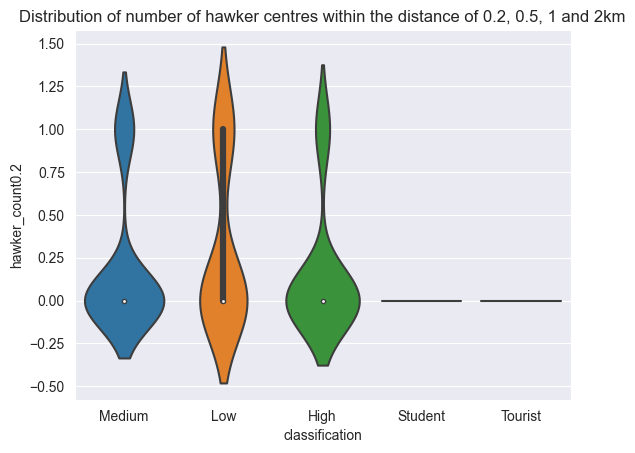

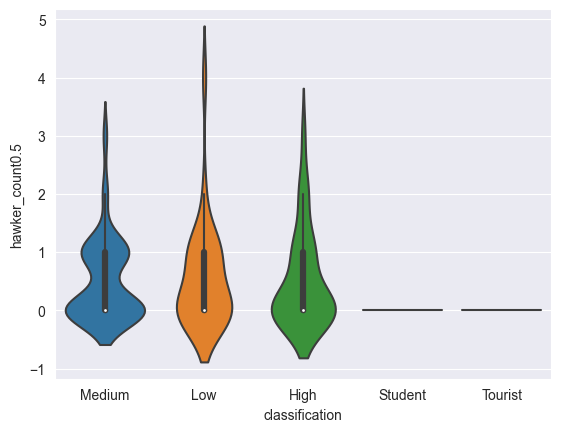

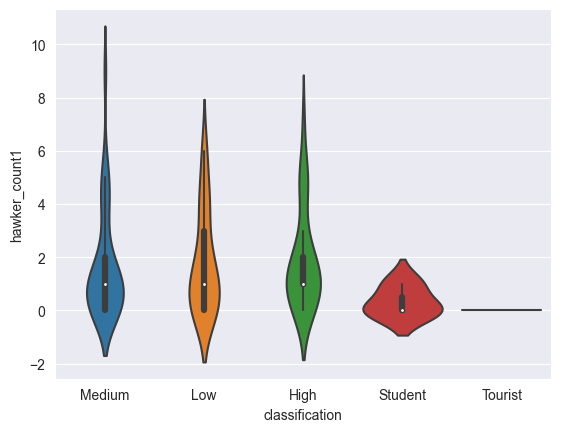

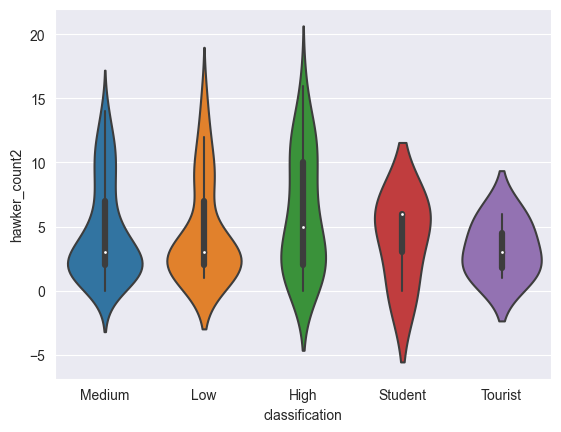

In [ ]:
# do a violin plot of classification against hawker_count0.2, hawker_count0.5, hawkers_count1, hawker_count2
# to see if there is a difference in the distribution of the number of hawker centres within the distance
# of 0.2, 0.5, 1 and 2km

# set the title
plt.title('Distribution of number of hawker centres within the distance of 0.2, 0.5, 1 and 2km')

# set the x-axis label
plt.xlabel('Classification')

# set the y-axis label
plt.ylabel('Number of hawker centres')

# plot the violin plot
sns.violinplot(x='classification', y='hawker_count0.2', data=mcd_df)

# show the plot
plt.show()

sns.violinplot(x='classification', y='hawker_count0.5', data=mcd_df)

# show the plot
plt.show()

sns.violinplot(x='classification', y='hawker_count1', data=mcd_df)

# show the plot
plt.show()

sns.violinplot(x='classification', y='hawker_count2', data=mcd_df)

# show the plot
plt.show()

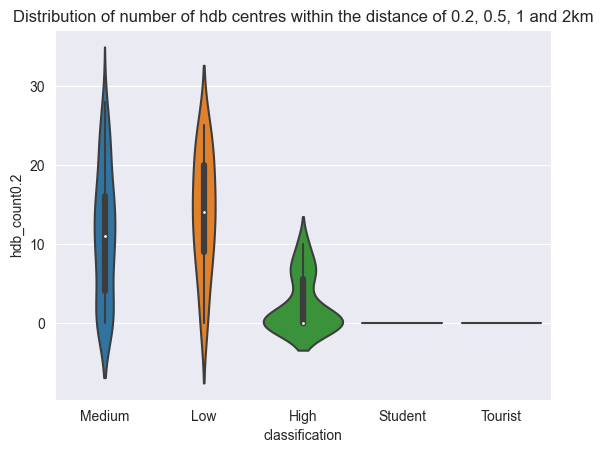

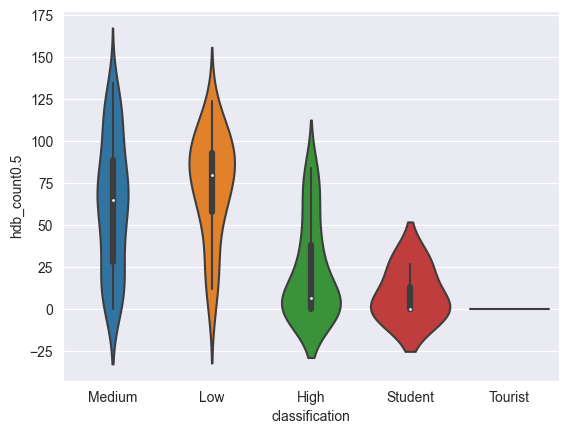

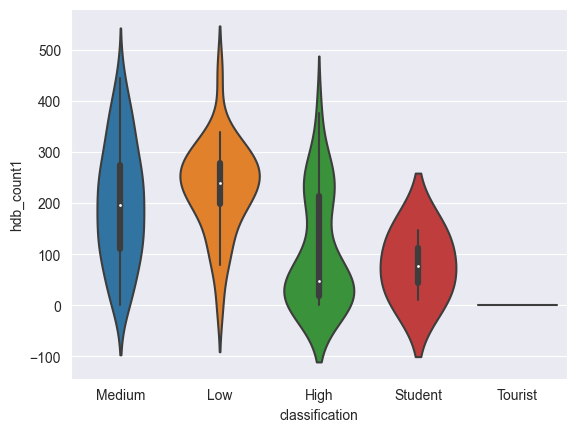

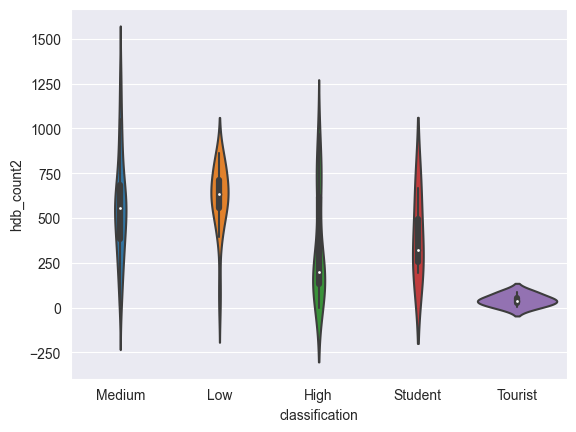

In [ ]:
# do a violin plot of classification against hawker_count0.2, hawker_count0.5, hawkers_count1, hawker_count2
# to see if there is a difference in the distribution of the number of hawker centres within the distance
# of 0.2, 0.5, 1 and 2km

# set the title
plt.title('Distribution of number of hdb centres within the distance of 0.2, 0.5, 1 and 2km')

# set the x-axis label
plt.xlabel('Classification')

# set the y-axis label
plt.ylabel('Number of hawker centres')

# plot the violin plot
sns.violinplot(x='classification', y='hdb_count0.2', data=mcd_df)

# show the plot
plt.show()

sns.violinplot(x='classification', y='hdb_count0.5', data=mcd_df)

# show the plot
plt.show()

sns.violinplot(x='classification', y='hdb_count1', data=mcd_df)

# show the plot
plt.show()

sns.violinplot(x='classification', y='hdb_count2', data=mcd_df)

# show the plot
plt.show()

In [ ]:
len(mcd_df.columns)

70

In [ ]:
mcd_df_copy = mcd_df.copy()
mcd_df_copy.drop(['population','size','region','region_type','property_type','title', 'address', 'latitude', 'longitude','planning_area'], axis=1, inplace=True)

In [ ]:
# drop classification that are Student or Tourist
mcd_df_copy = mcd_df_copy[mcd_df_copy['classification'] != 'Student']
mcd_df_copy = mcd_df_copy[mcd_df_copy['classification'] != 'Tourist']
# mcd_df_copy = mcd_df_copy[mcd_df_copy['classification'] != 'High']

In [ ]:
# import train test split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np

# train a decision tree classifier
X = mcd_df_copy.drop('classification', axis=1)
y = mcd_df_copy['classification']

# create dummies for 'Planning Area'
# X = pd.get_dummies(X, columns=['Region Type'], drop_first=True)
# convert X.columns to a list
X.col = list(X.columns)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_70362/1953213631.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.col = list(X.columns)


### Evaluate best metrics for High Medium Low

In [ ]:
# first model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# second model
# import a bunch of classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

In [ ]:
from xgboost import XGBClassifier

In [ ]:
X = mcd_df_copy.drop('classification', axis=1)
y = mcd_df_copy['classification']
# change y values to 0,1,2
y = y.map({'Low':0, 'Medium':1, 'High':2})
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ('tnf1',StandardScaler(),numerical_features),
    ('tnf3',OneHotEncoder(),categorical_features)
    ])
smote = SMOTE(random_state=42)
rf = XGBClassifier()

# Implement a random forest
# instantiate the model

# create a dictionary of all values we want to test for random forest
params = {
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__random_state': [42]
}

pipeline = imbPipeline(steps=[('preprocessor', preprocessor),('smote',smote),('classifier', rf)])

# instantiate the gridsearch
grid = GridSearchCV(pipeline, params, cv=5, scoring ='f1_macro', verbose=2)

# fit model to data
grid.fit(X_train, y_train)

# predict the test data
y_pred = grid.predict(X_test)

# print the best parameters
print(grid.best_params_)
print(f'{grid.best_score_}')
print(grid.best_estimator_)
print(grid.best_index_)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
[CV] END classifier__colsample_bytree=0.6, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__min_child_weight=1, classifier__n_estimators=100, classifier__random_state=42, classifier__subsample=0.6; total time=   0.6s
[CV] END classifier__colsample_bytree=0.6, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__min_child_weight=1, classifier__n_estimators=100, classifier__random_state=42, classifier__subsample=0.6; total time=   0.6s
[CV] END classifier__colsample_bytree=0.6, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__min_child_weight=1, classifier__n_estimators=100, classifier__random_state=42, classifier__subsample=0.6; total time=   0.5s
[CV] END classifier__colsample_bytree=0.6, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__min_child_weight=1, classifier__

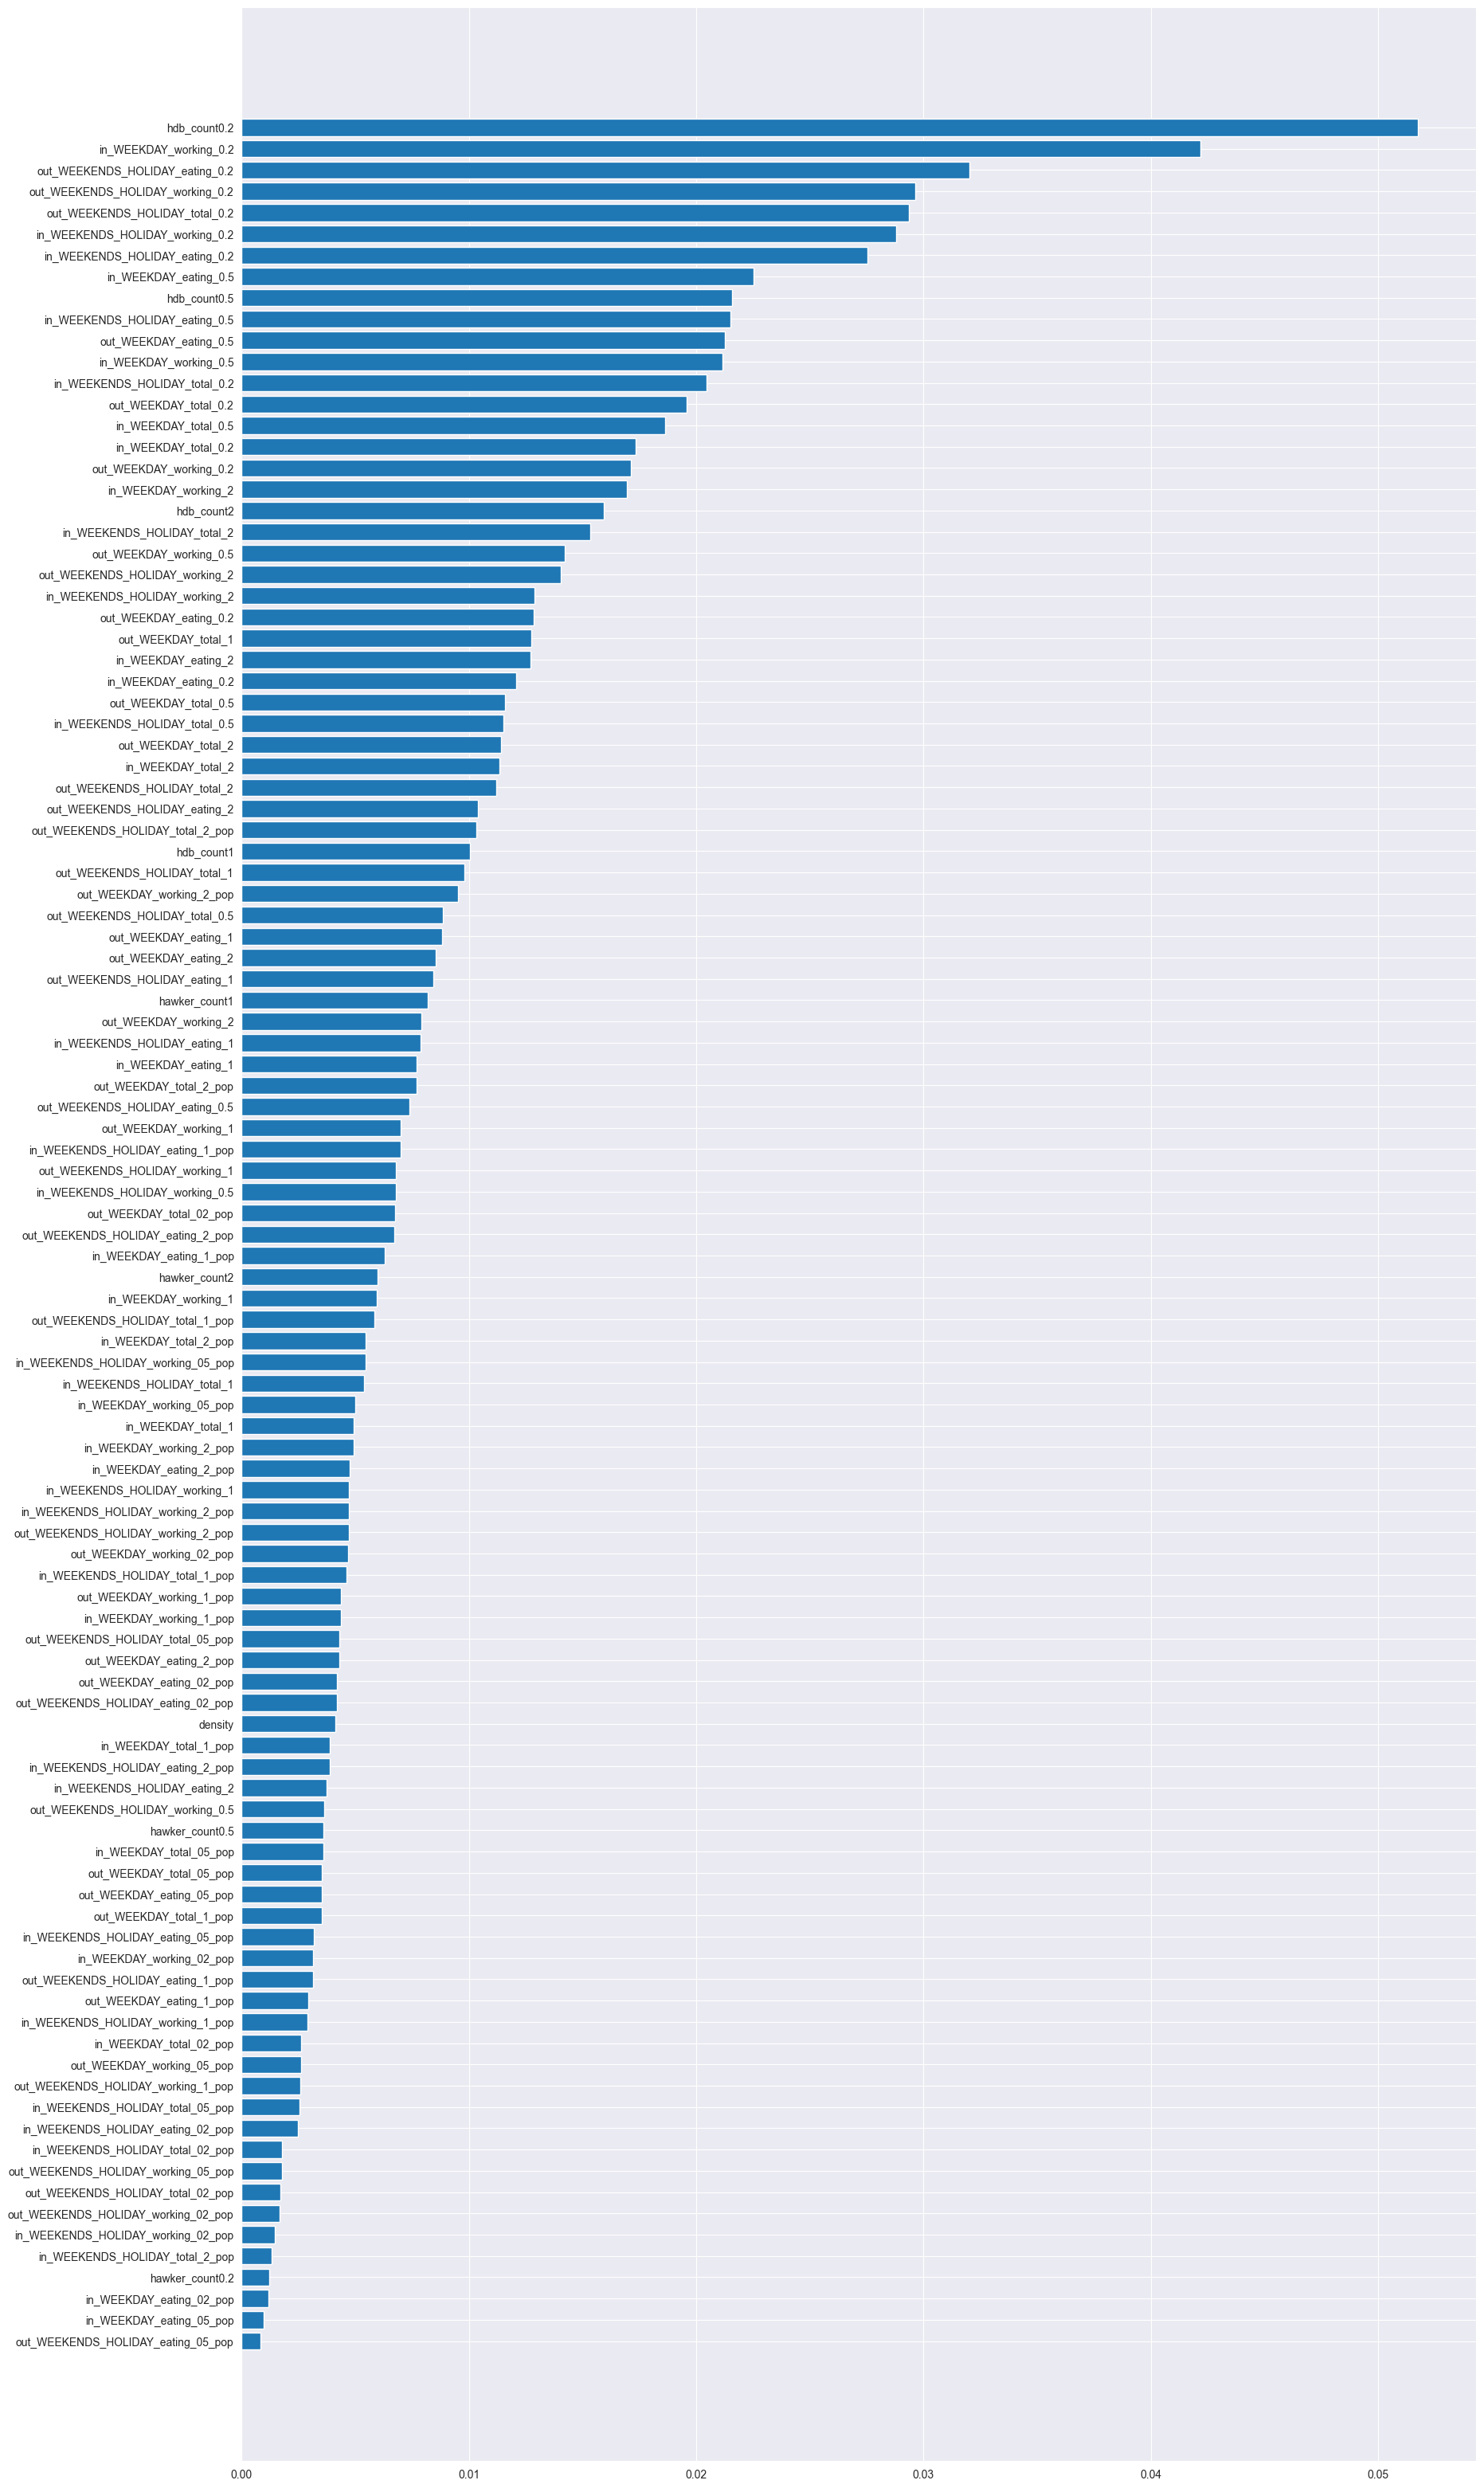

In [ ]:
# change fig size to fit all the axis labels
plt.figure(figsize=(20,40))
best = grid.best_estimator_
f_i = list(zip(X.columns,best.named_steps['classifier'].feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [ ]:
# print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.52      0.59      0.55        22
           2       0.50      0.30      0.37        10

    accuracy                           0.50        42
   macro avg       0.49      0.46      0.47        42
weighted avg       0.50      0.50      0.49        42



[[ 5  5  0]
 [ 6 13  3]
 [ 0  7  3]]


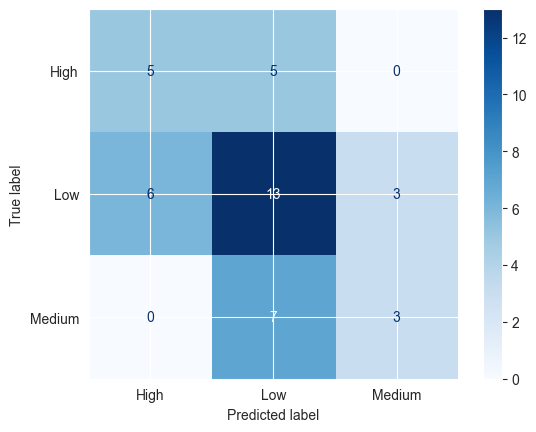

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None)
]

disp = ConfusionMatrixDisplay.from_estimator(
    grid.best_estimator_,
    X_test,
    y_test,
    display_labels=['High','Low','Medium'],
    cmap=plt.cm.Blues,
)

print(disp.confusion_matrix)

plt.show()

In [ ]:
mcd_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 143
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   classification                     137 non-null    object  
 1   hawker index                       137 non-null    float64 
 2   density                            137 non-null    float64 
 3   hawker_count0.2                    137 non-null    int64   
 4   hawker_count0.5                    137 non-null    int64   
 5   hawker_count1                      137 non-null    int64   
 6   hawker_count2                      137 non-null    int64   
 7   hdb_count0.2                       137 non-null    int64   
 8   hdb_count0.5                       137 non-null    int64   
 9   hdb_count1                         137 non-null    int64   
 10  hdb_count2                         137 non-null    int64   
 11  in_WEEKDAY_working_0.2             137 non-nu

In [ ]:
features = ['hawker index','density','hdb_count0.2','in_WEEKENDS_HOLIDAY_total_0.2_bin']
new_X = X[features]

In [ ]:
# X = mcd_df_copy.drop('classification', axis=1)
y = mcd_df_copy['classification']
numerical_features = new_X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ('tnf1',StandardScaler(),numerical_features),
    ('tnf3',OneHotEncoder(),categorical_features)
    ])
smote = SMOTE(random_state=42)
rf = RandomForestClassifier()

# Implement a random forest
# instantiate the model

# create a dictionary of all values we want to test for random forest
params = {'classifier__n_estimators':[100,200],'classifier__criterion': ['gini', 'entropy'], 'classifier__max_depth': np.arange(3,8)}
pipeline = imbPipeline(steps=[('preprocessor', preprocessor),('smote',smote),('classifier', rf)])

# instantiate the gridsearch
grid = GridSearchCV(pipeline, params, cv=5, scoring ='precision')

# fit model to data
grid.fit(X_train, y_train)

# predict the test data
y_pred = grid.predict(X_test)

# print the best parameters
print(grid.best_params_)
print(f'{grid.best_score_}')
print(grid.best_estimator_)
print(grid.best_index_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1776, in precision_scor

{'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
nan
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tnf1', StandardScaler(),
                                                  ['hawker index', 'density',
                                                   'hdb_count0.2']),
                                                 ('tnf3', OneHotEncoder(),
                                                  ['in_WEEKENDS_HOLIDAY_total_0.2_bin'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(max_depth=3))])
0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1776, in precision_scor

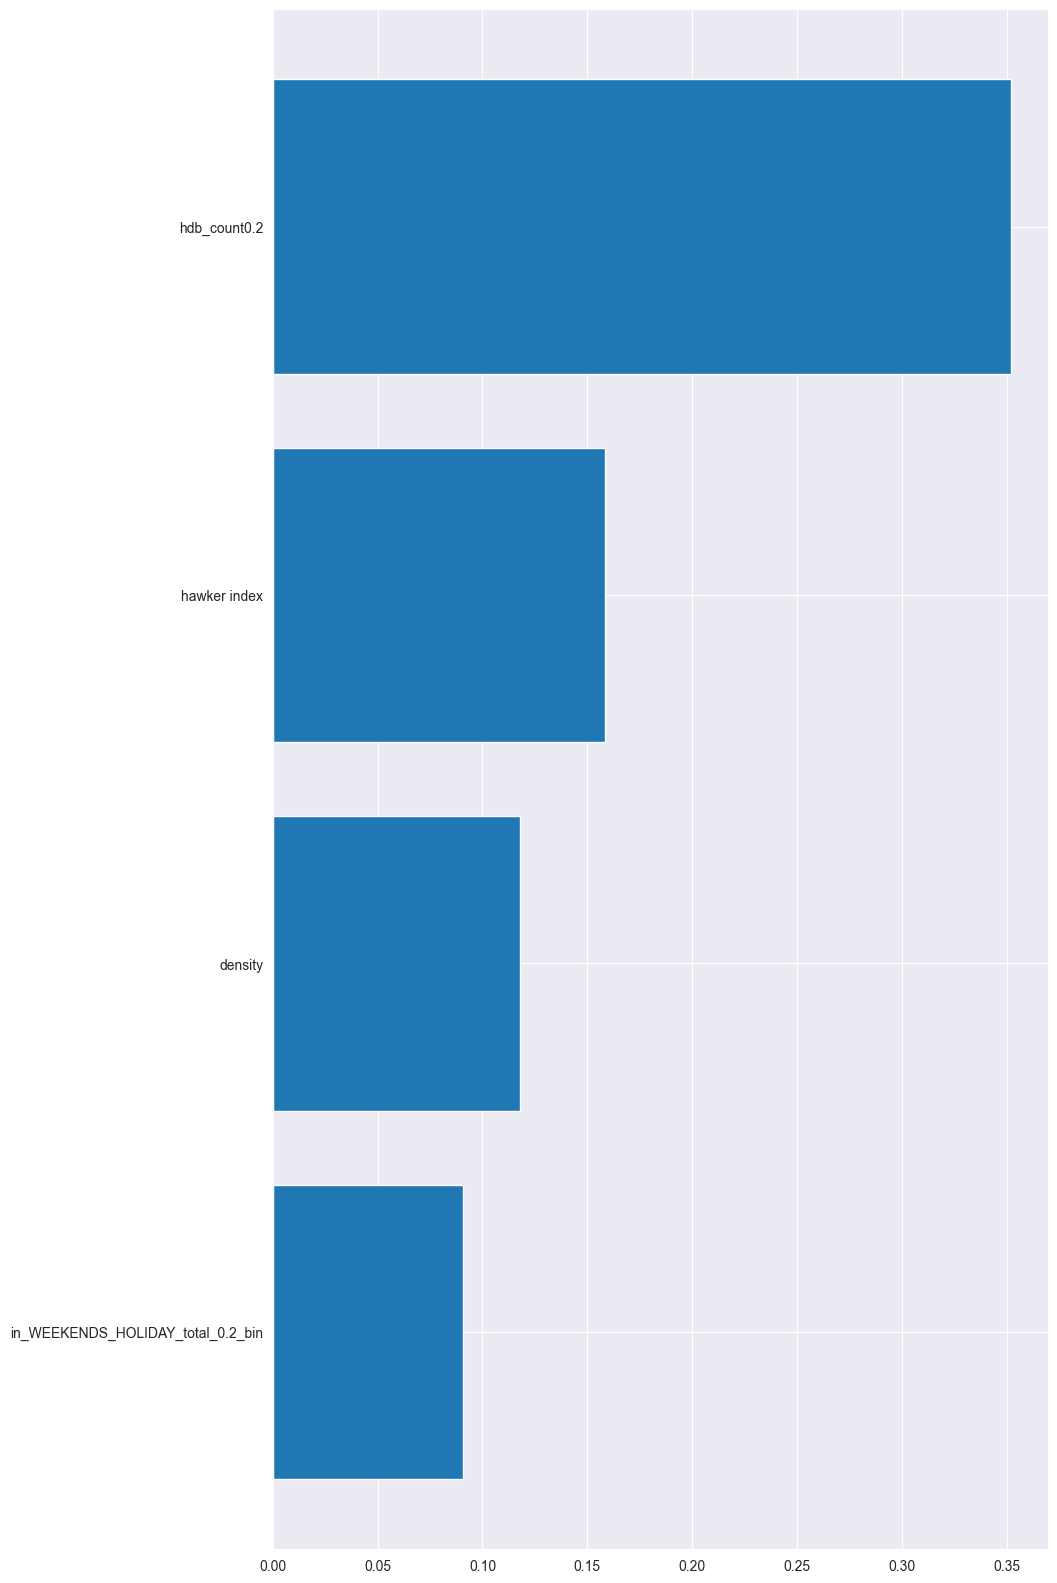

In [ ]:
# change fig size to fit all the axis labels
plt.figure(figsize=(10,20))
best = grid.best_estimator_
f_i = list(zip(new_X.columns,best.named_steps['classifier'].feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [ ]:
# print the classification report
print(classification_report(y_test,y_pred))

ValueError: Mix of label input types (string and number)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None)
]

disp = ConfusionMatrixDisplay.from_estimator(
    grid.best_estimator_,
    X_test,
    y_test,
    display_labels=['High','Low','Medium'],
    cmap=plt.cm.Blues,
)

print(disp.confusion_matrix)

plt.show()

ValueError: Mix of label input types (string and number)

### Evaluate best metrics for Medium vs Low

In [ ]:
# Implement a random forest
# create a dictionary of all values we want to test for random forest
param_grid = {'n_estimators': [100, 300, 500], 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 5), 'min_samples_split': np.arange(2, 5), 'min_samples_leaf': np.arange(2, 5), 'max_features': [None,'log2','sqrt']}

# random forest model
rfc = RandomForestClassifier()

# use gridsearch to test all values for random forest
rfc_gscv = GridSearchCV(rfc, param_grid, cv=5)

# fit model to data
rfc_gscv.fit(X_train, y_train)

# predict the test data
predictions = rfc_gscv.predict(X_test)

# print the best parameters
print(rfc_gscv.best_params_)
print(f'{rfc_gscv.best_score_}')
print(rfc_gscv.best_estimator_)
print(rfc_gscv.best_index_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.7507352941176471
RandomForestClassifier(max_depth=4, max_features=None, min_samples_leaf=3,
                       min_samples_split=4)
96


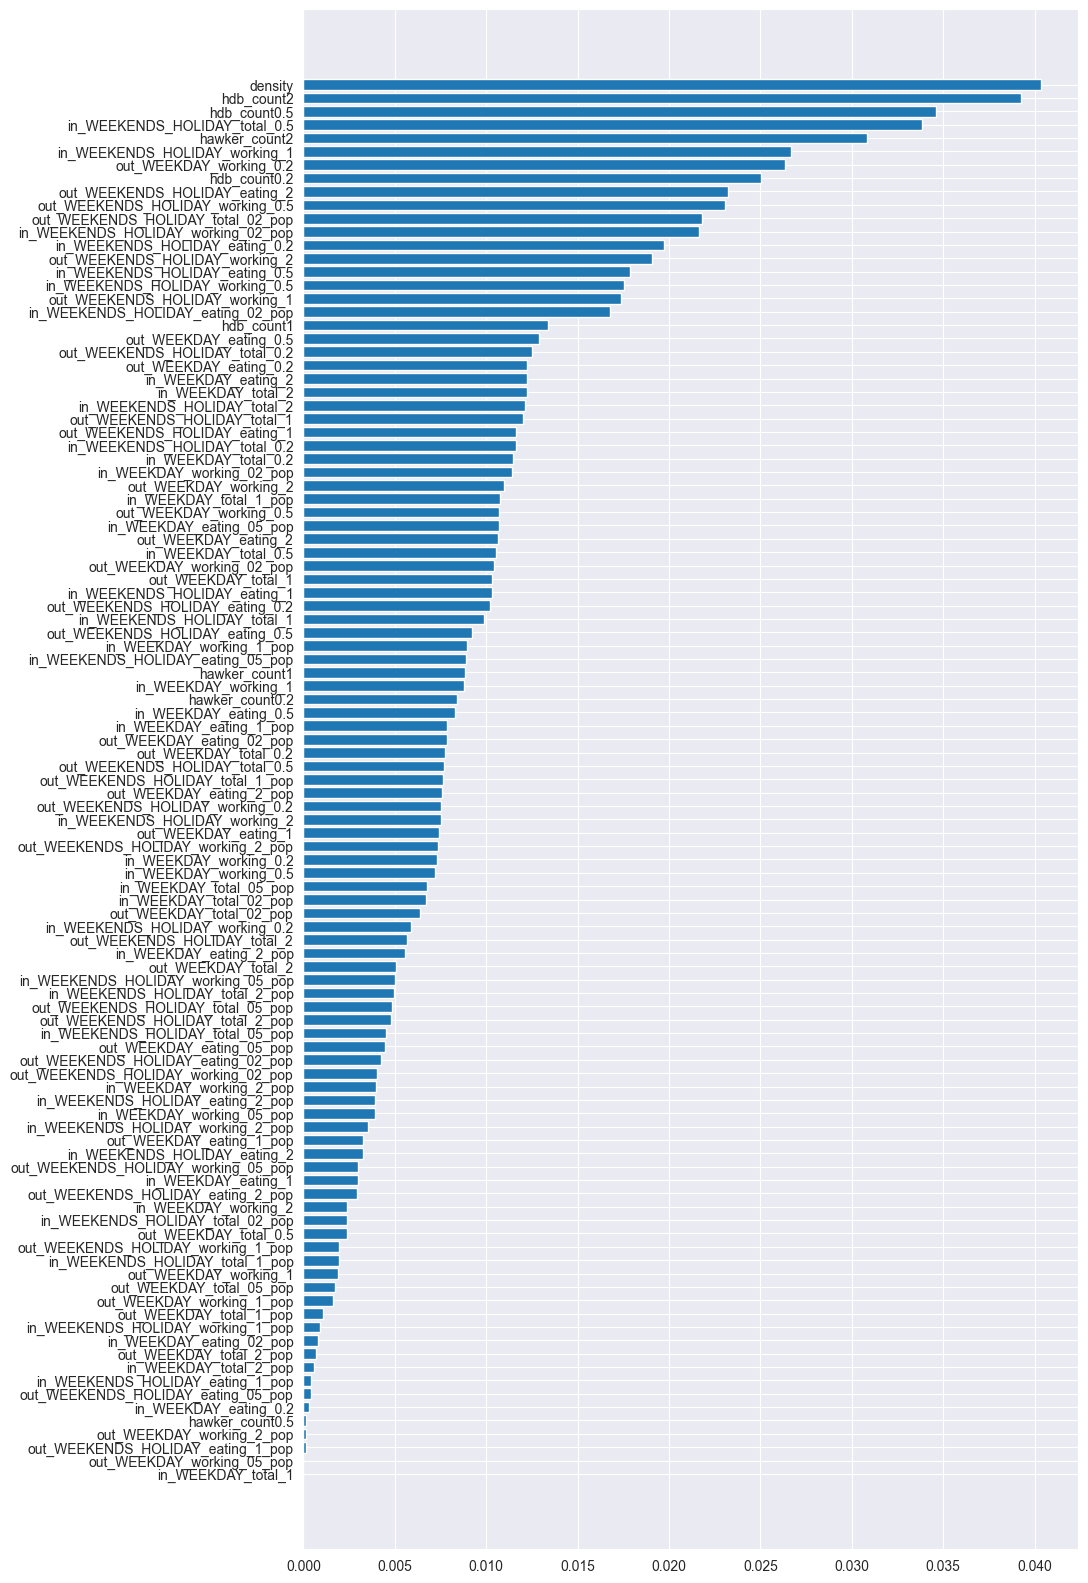

In [ ]:
# change fig size to fit all the axis labels
plt.figure(figsize=(10,20))
best = rfc_gscv.best_estimator_
f_i = list(zip(X.col,best.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

[[ 0  7]
 [ 0 15]]


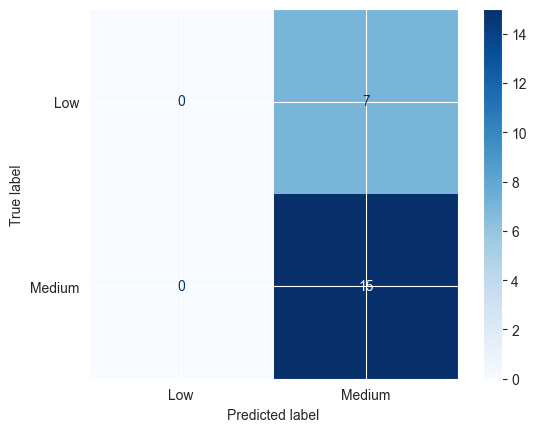

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None)
]

disp = ConfusionMatrixDisplay.from_estimator(
    rfc_gscv.best_estimator_,
    X_test,
    y_test,
    display_labels=['Low','Medium'],
    cmap=plt.cm.Blues,
)

print(disp.confusion_matrix)

plt.show()

### Try to log the results

In [ ]:

# train a decision tree classifier
X = mcd_df_copy.drop('classification', axis=1)

# log transform including values with 0
X = X.apply(lambda x: np.log(x + 1e-8))

# create dummies for 'Planning Area'
# X = pd.get_dummies(X, columns=['Region Type'], drop_first=True)
# convert X.columns to a list
X.col = list(X.columns)

y = mcd_df_copy['classification']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_32821/903497666.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.col = list(X.columns)


In [ ]:
# Implement a random forest
# create a dictionary of all values we want to test for random forest
param_grid = {'n_estimators': [100, 300, 500], 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 5), 'min_samples_split': np.arange(2, 5), 'min_samples_leaf': np.arange(2, 5), 'max_features': [None,'log2','sqrt']}

# random forest model
rfc = RandomForestClassifier()

# use gridsearch to test all values for random forest
rfc_gscv = GridSearchCV(rfc, param_grid, cv=5)

# fit model to data
rfc_gscv.fit(X_train, y_train)

# predict the test data
predictions = rfc_gscv.predict(X_test)

# print the best parameters
print(rfc_gscv.best_params_)
print(f'{rfc_gscv.best_score_}')
print(rfc_gscv.best_estimator_)
print(rfc_gscv.best_index_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
0.6606060606060605
RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3)
273


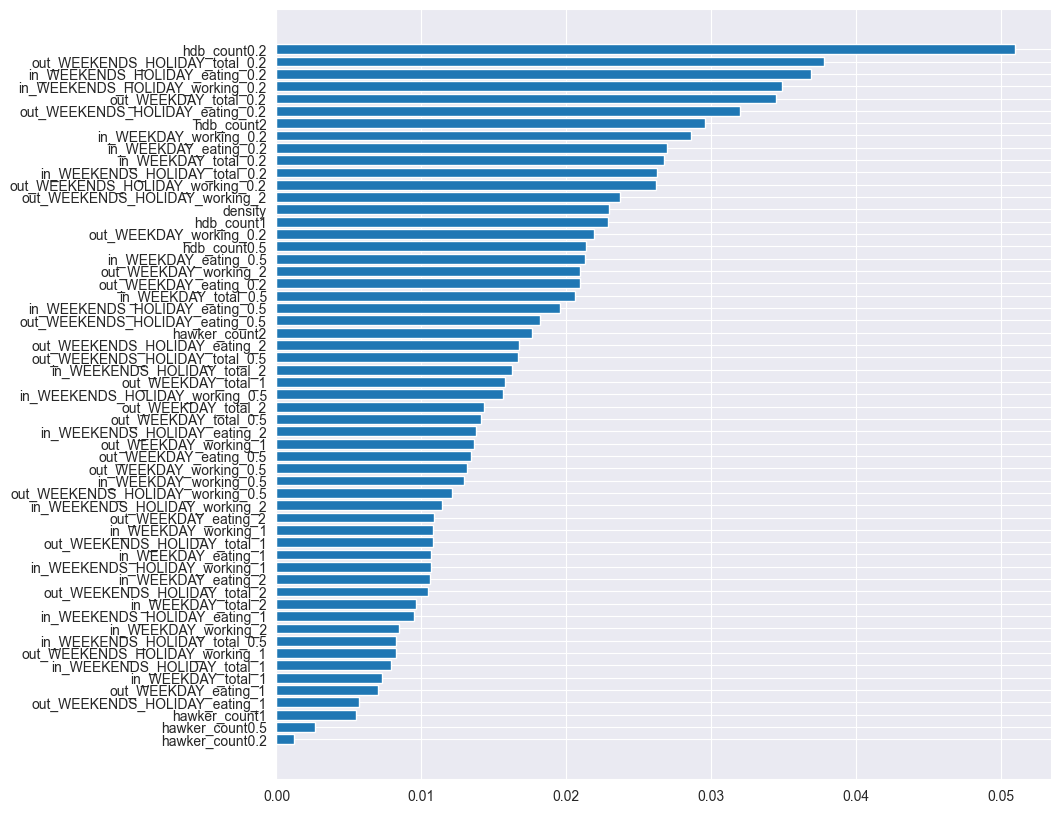

In [ ]:
# change fig size to fit all the axis labels
plt.figure(figsize=(10,10))
best = rfc_gscv.best_estimator_
f_i = list(zip(X.col,best.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

### Try feature selection

In [ ]:
features =['classification', # target variable
           'out_WEEKENDS_HOLIDAY_eating_0.5','out_WEEKENDS_HOLIDAY_working_0.5','in_WEEKDAY_eating_0.2','hdb_count2' # medium vs low
           ,'hdb_count0.2','out_WEEKENDS_HOLIDAY_total_0.2' # high
            #  ,'density'
             ]

In [ ]:
fs_df = mcd_df_copy[features]

In [ ]:
# train a decision tree classifier
X = fs_df.drop('classification', axis=1)

# create dummies for 'Planning Area'
# X = pd.get_dummies(X, columns=['Region Type'], drop_first=True)
# convert X.columns to a list
X.col = list(X.columns)

y = fs_df['classification']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_32821/149448396.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.col = list(X.columns)


In [ ]:
# Implement a random forest
# create a dictionary of all values we want to test for random forest
param_grid = {'n_estimators': [100, 300, 500], 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 5), 'min_samples_split': np.arange(2, 5), 'min_samples_leaf': np.arange(2, 5), 'max_features': [None,'log2','sqrt']}

# random forest model
rfc = RandomForestClassifier()

# use gridsearch to test all values for random forest
rfc_bf = GridSearchCV(rfc, param_grid, cv=5)

# fit model to data
rfc_bf.fit(X_train, y_train)

# predict the test data
predictions = rfc_bf.predict(X_test)

# print the best parameters
print(rfc_bf.best_params_)
print(f'{rfc_bf.best_score_}')
print(rfc_bf.best_estimator_)
print(rfc_bf.best_index_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 500}
0.6692640692640692
RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       min_samples_split=4, n_estimators=500)
242


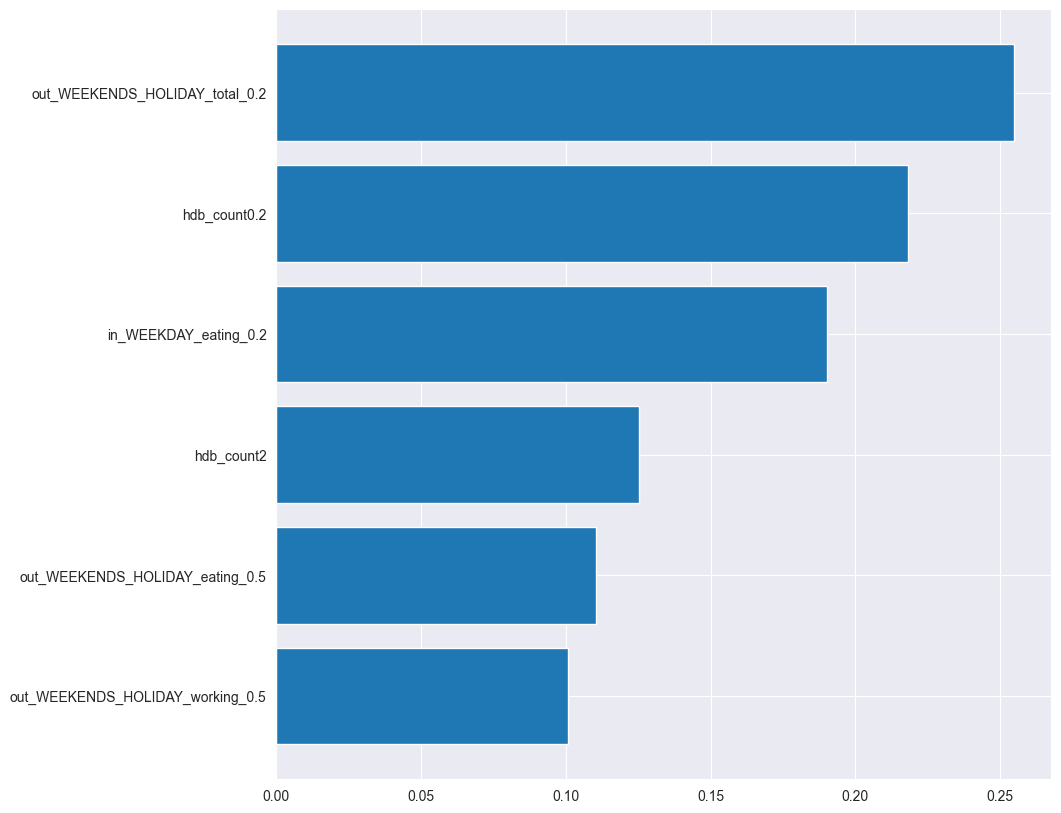

In [ ]:
# change fig size to fit all the axis labels
plt.figure(figsize=(10,10))
best = rfc_bf.best_estimator_
f_i = list(zip(X.col,best.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

[[ 3  0  5]
 [ 0  0  6]
 [ 1  0 13]]


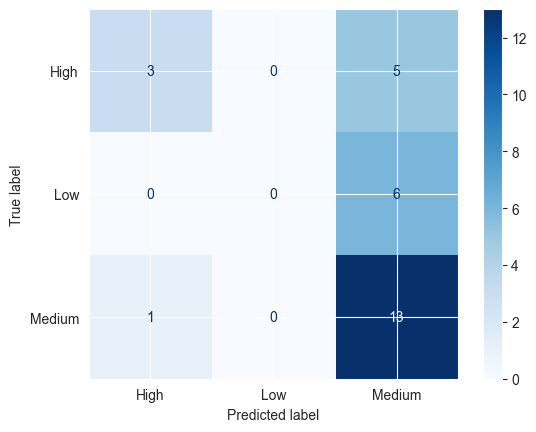

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None)
]

disp = ConfusionMatrixDisplay.from_estimator(
    rfc_bf.best_estimator_,
    X_test,
    y_test,
    display_labels=['High','Low','Medium'],
    cmap=plt.cm.Blues,
)

print(disp.confusion_matrix)

plt.show()